# Beginning

We will cover the following topics in seaborn library:
> - Kernel Density Estimate (KDE) plot.
> - Histogram.
> - [Box plot](#Box-plot).
> - [Scatter plot](#Scatter-plot).
> - [Line plot](#Line-plot).
> - [Heatmap](#Heatmap).
> - [Bar plot](#Bar-plot).
> - [Count plot](#Count-plot).
> - [Color palettes and customizations](#Color-palette).

First of all, we will import the libraries we will need in the whole notebook:

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

We import the data we will need for the first topic from seaborn library.

In [41]:
data = sns.load_dataset("mpg").dropna()
data.shape

(392, 9)

In [42]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

# Univariate(1D) KDE plot

In [43]:
sns.set_style("whitegrid")

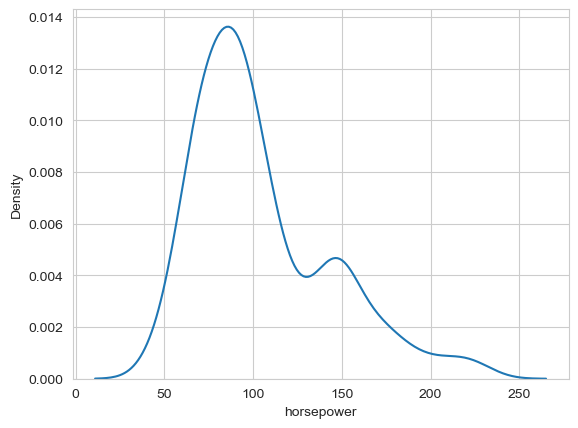

In [44]:
sns.kdeplot(data.horsepower)
plt.show()

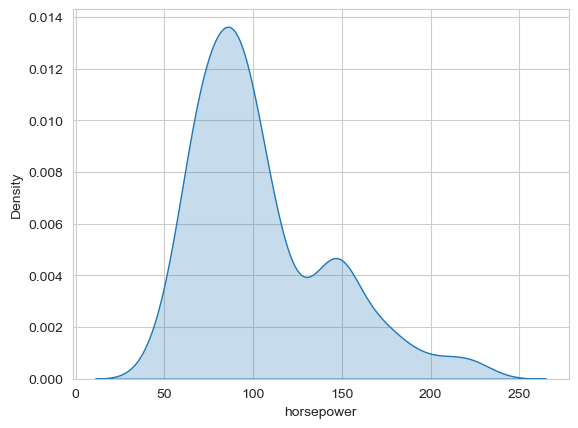

In [45]:
sns.kdeplot(data.horsepower, shade=True)
plt.show()

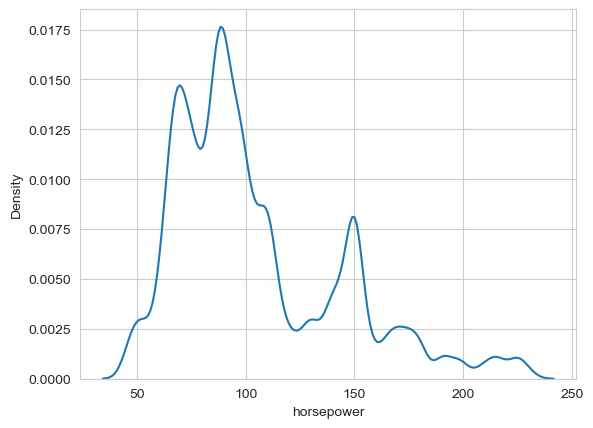

In [46]:
sns.kdeplot(data.horsepower, bw=0.1);

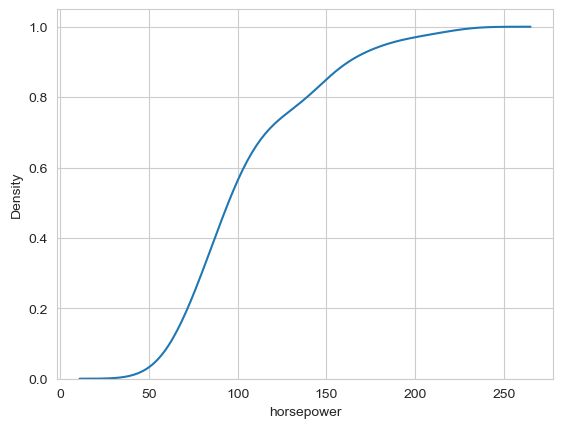

In [47]:
sns.kdeplot(data.horsepower, cumulative=True);

# Bi-variate(2D) KDE plot

In [ ]:
sns.kdeplot(x = 'horsepower', y='weight', data = data);

In [ ]:
sns.kdeplot(x = 'horsepower', y='weight', data = data, n_levels=15);

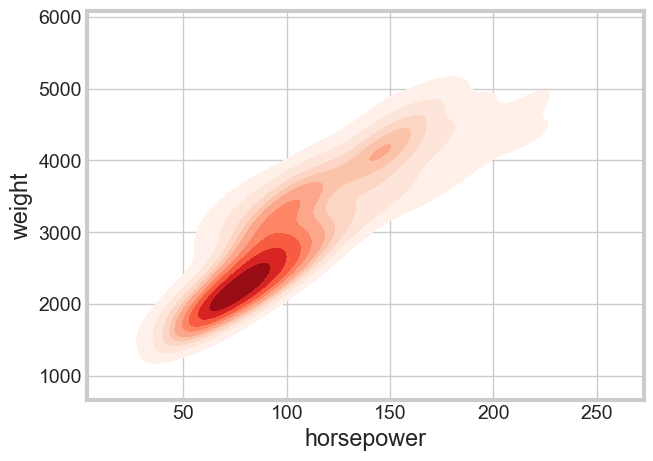

In [43]:
sns.kdeplot(x = 'horsepower', y='weight', data = data, cmap="Reds", shade=True, shade_lowest=False);

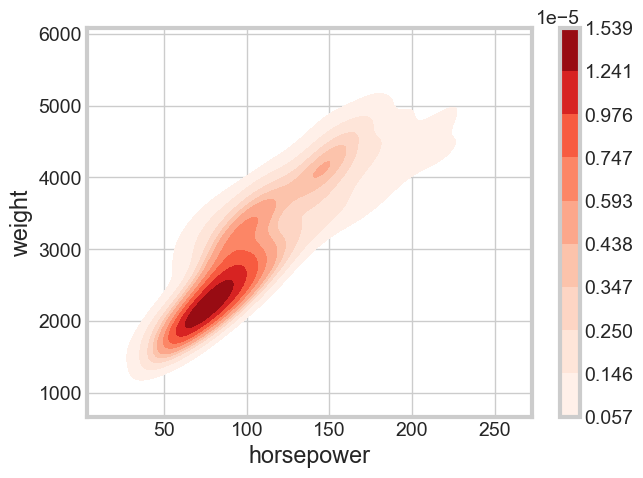

In [44]:
sns.kdeplot(x = 'horsepower', y='weight', data = data, cmap="Reds", shade=True, shade_lowest=False, cbar=True);

KeyboardInterrupt: 

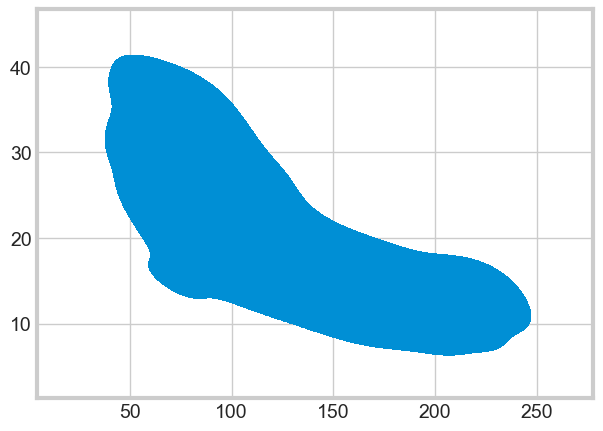

In [45]:
sns.kdeplot(x = 'horsepower', y='mpg', data = data, 
            shade=True, hue=data.origin);

# Univariate(1D) histogram

We will use the same dataset for the next topic.

In [ ]:
sns.histplot(data.horsepower); # or sns.histplot(x = 'horsepower', data = data);

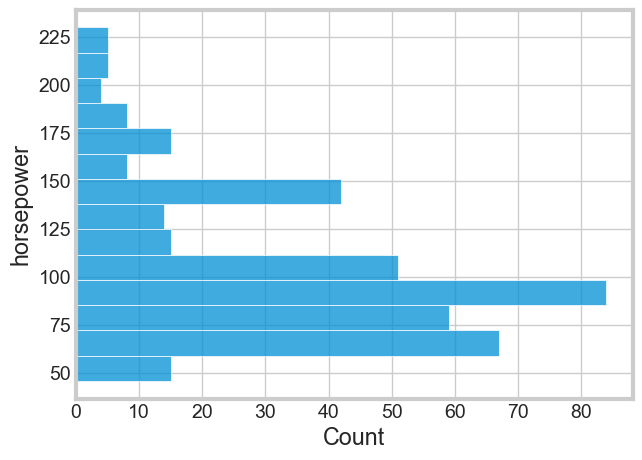

In [46]:
sns.histplot(y = 'horsepower', data = data);

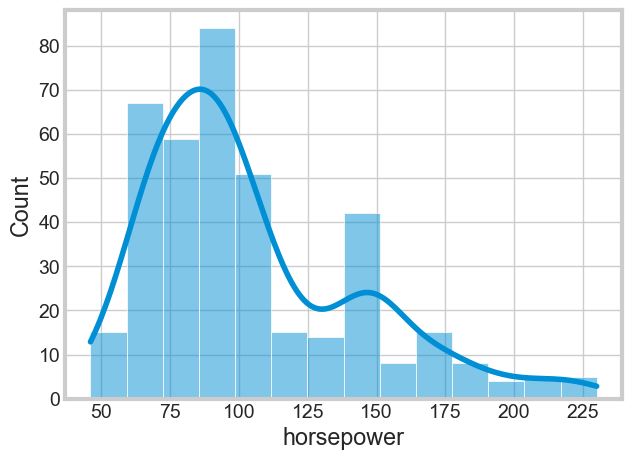

In [47]:
sns.histplot(data.horsepower, kde=True);

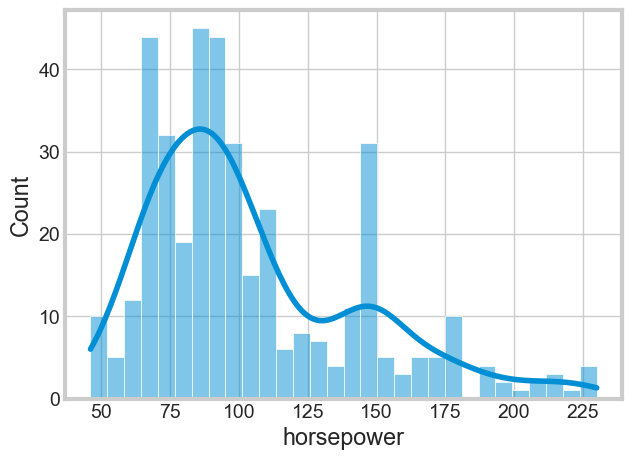

In [48]:
sns.histplot(data.horsepower, bins = 30, kde=True);

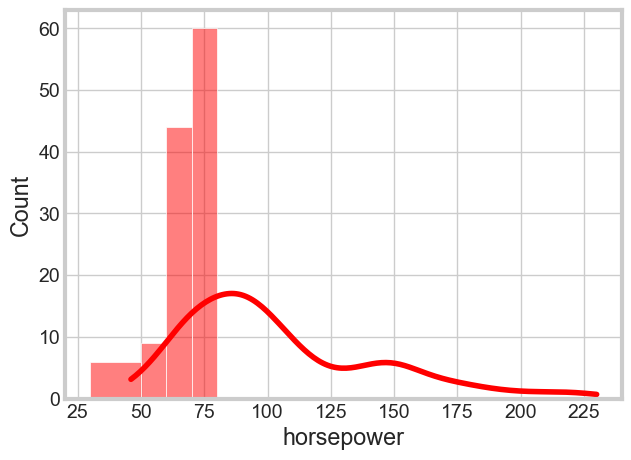

In [49]:
sns.histplot(data.horsepower, bins = [30, 50, 60, 70, 80], kde=True, color = 'red');

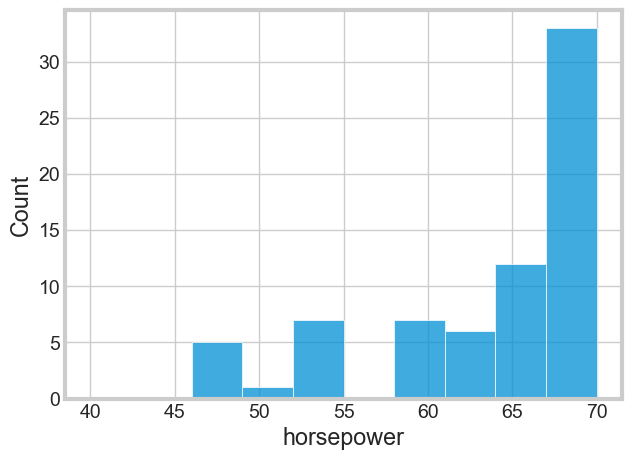

In [50]:
sns.histplot(data.horsepower, binwidth=3, binrange=(40, 70));

## Statistics of the data

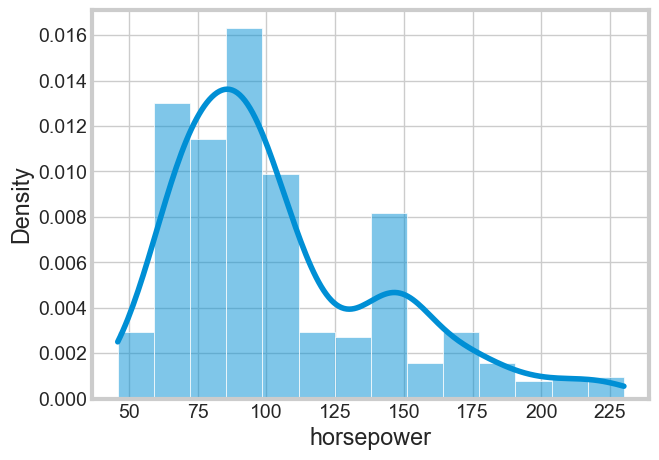

In [51]:
sns.histplot(data.horsepower, stat="density", kde=True); #area under the curve equals 1 or 100%

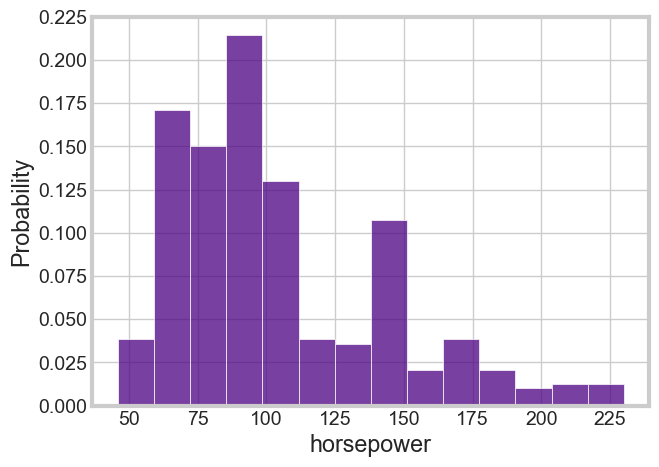

In [52]:
sns.histplot(data.horsepower, stat="probability", color="indigo");

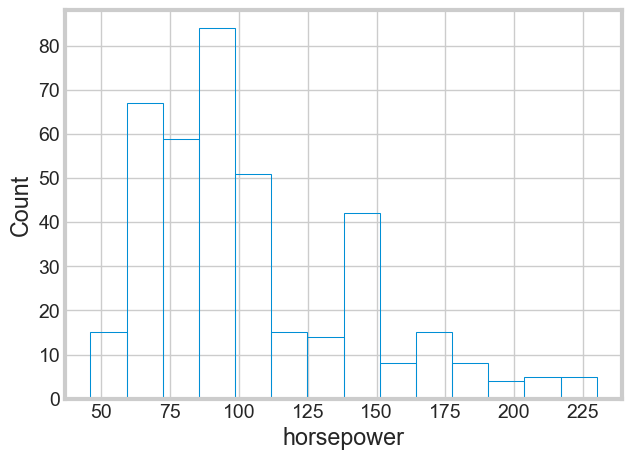

In [53]:
sns.histplot(data.horsepower, stat="count", fill=False);

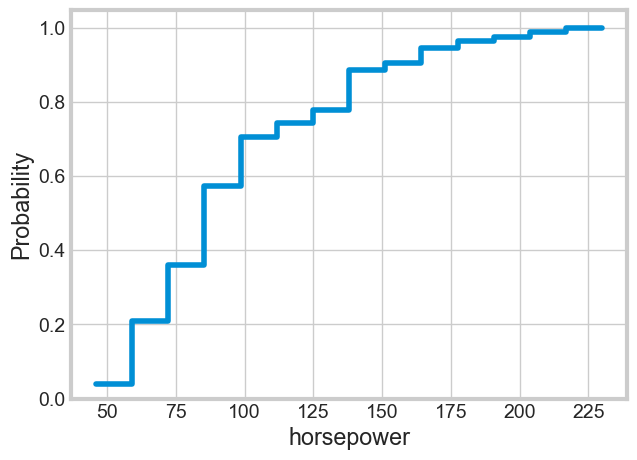

In [54]:
sns.histplot(data.horsepower, stat="probability", cumulative=True, fill=False, element="step");


## Categorical variables

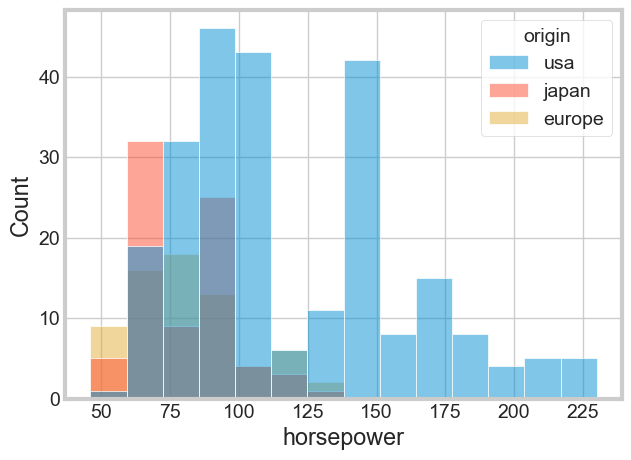

In [55]:
sns.histplot(x="horsepower", hue="origin", data = data, element="bars"); # default

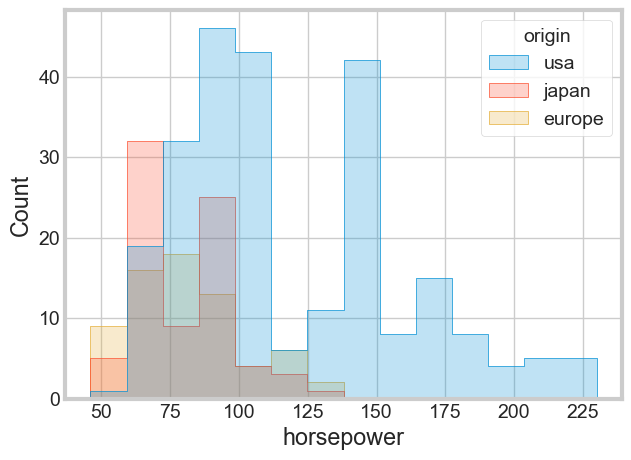

In [56]:
sns.histplot(x="horsepower", hue="origin", data = data, element="step");

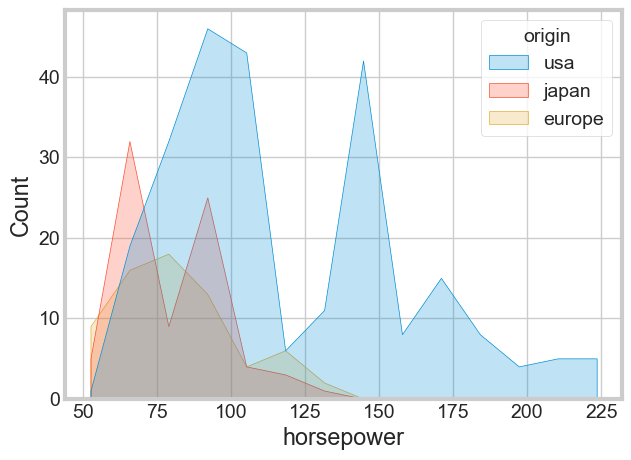

In [57]:
sns.histplot(x="horsepower", hue="origin", data = data, element="poly");

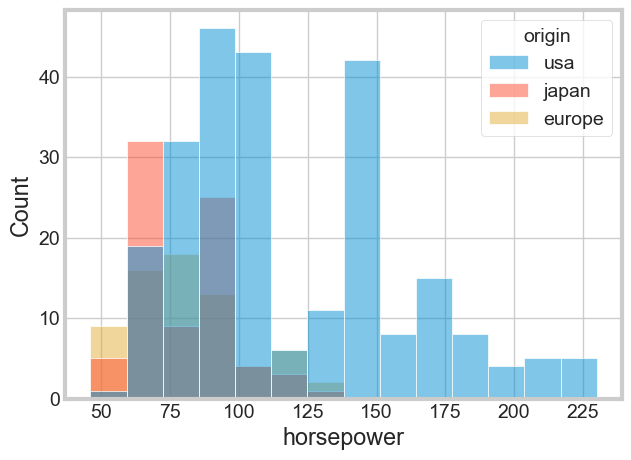

In [58]:
sns.histplot(x="horsepower", hue="origin", data = data, multiple="layer"); # default

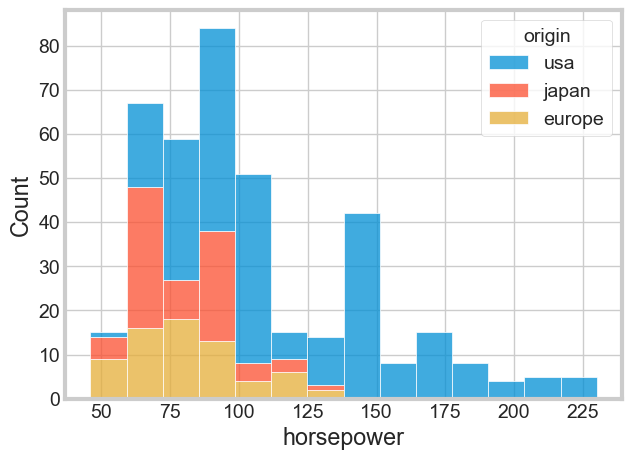

In [59]:
sns.histplot(x="horsepower", hue="origin", data = data, multiple="stack");

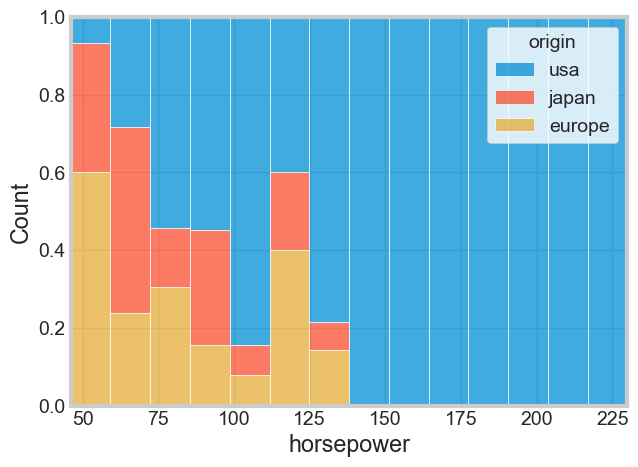

In [60]:
sns.histplot(x="horsepower", hue="origin", data = data, multiple="fill");

# Bi-variate(2D) histogram

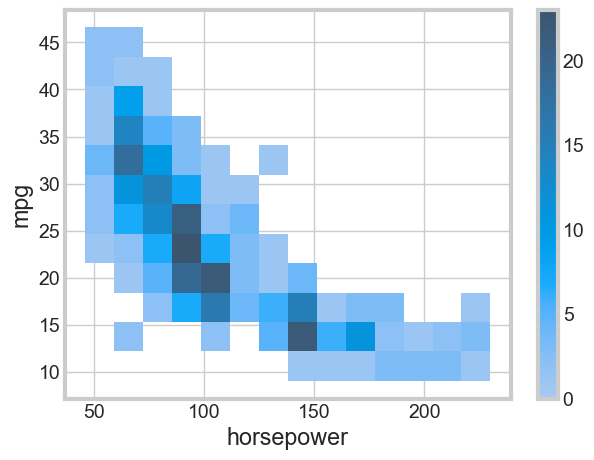

In [61]:
sns.histplot(x="horsepower", y="mpg", data = data, cbar=True);

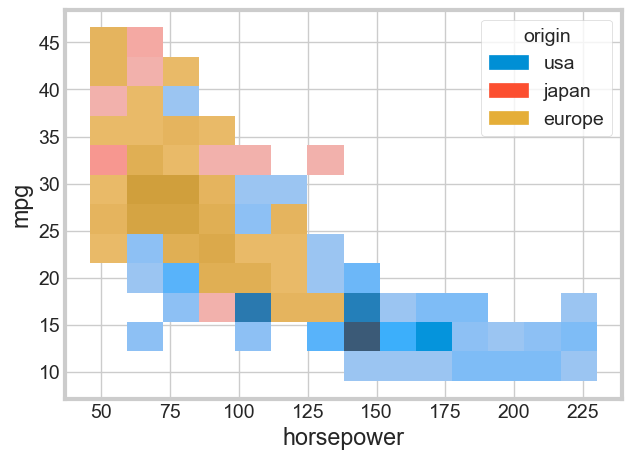

In [62]:
sns.histplot(x="horsepower", y="mpg", data = data, hue="origin");

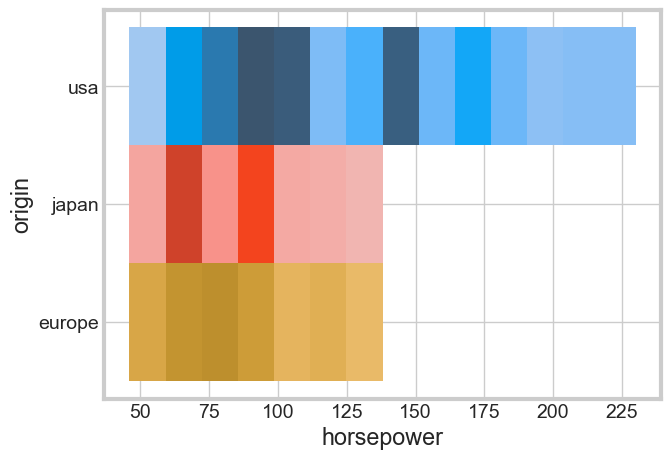

In [63]:
sns.histplot(x="horsepower", y="origin", data = data, hue="origin", legend=False);
# now it looks nice and clean

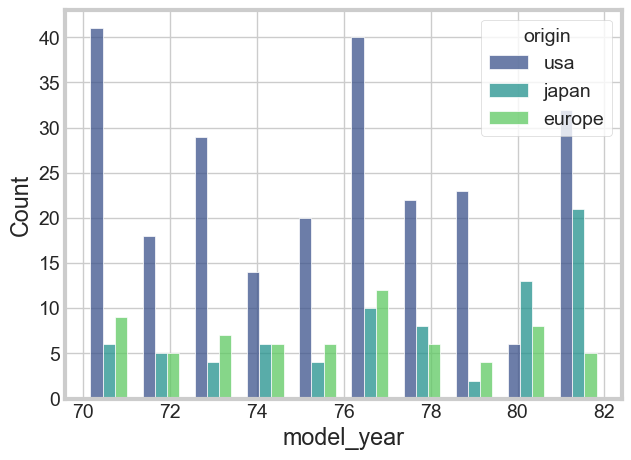

In [64]:
sns.histplot(x='model_year', hue='origin', data = data, multiple="dodge", shrink=0.7, palette="viridis");
# now we have space between the bars in each group

# Box plot

We will also use the same dataset for this topic.

In [65]:
data.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

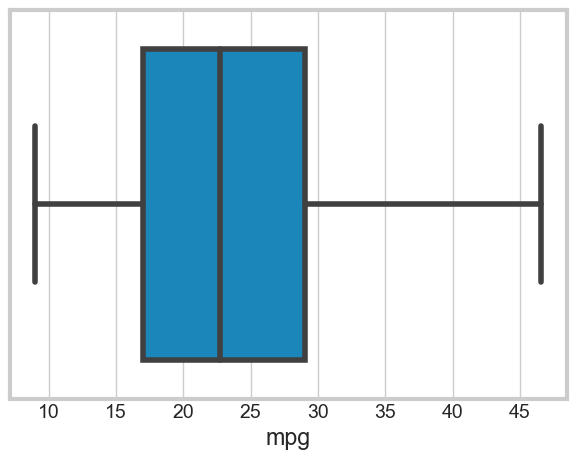

In [66]:
sns.boxplot(data.mpg);

In [67]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

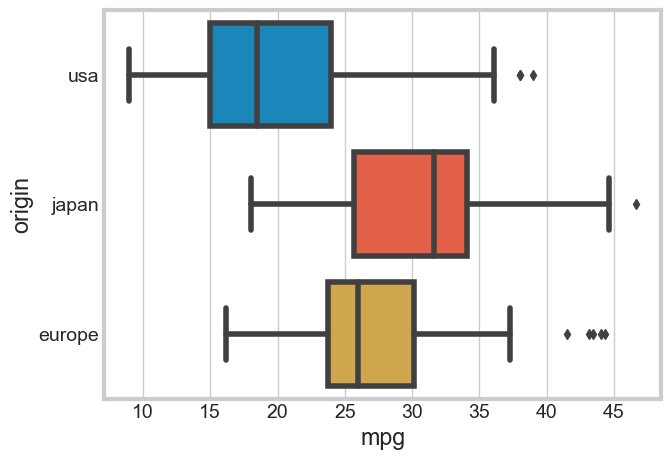

In [68]:
sns.boxplot(x=data.mpg, y=data.origin);

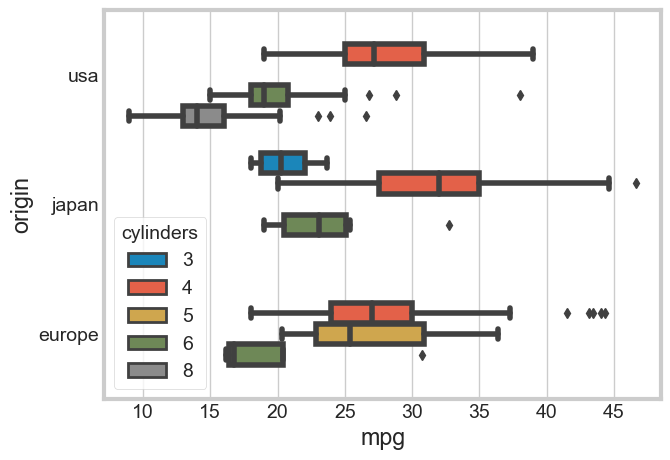

In [69]:
sns.boxplot(x=data.mpg, y=data.origin, hue=data.cylinders);

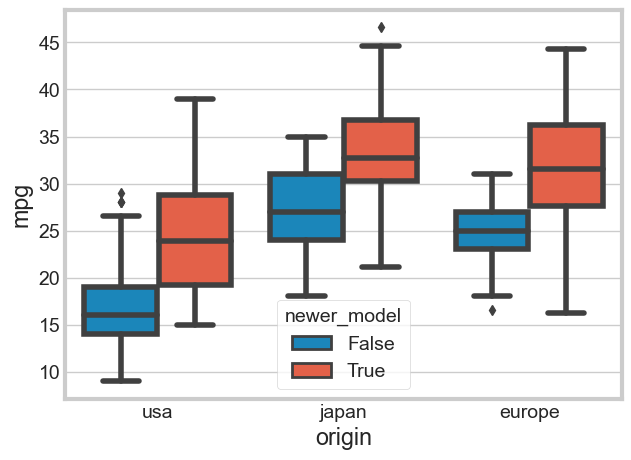

In [70]:
data['newer_model'] = data.model_year > 76
sns.boxplot(y=data.mpg, x=data.origin, hue=data.newer_model);

## Styling boxplot

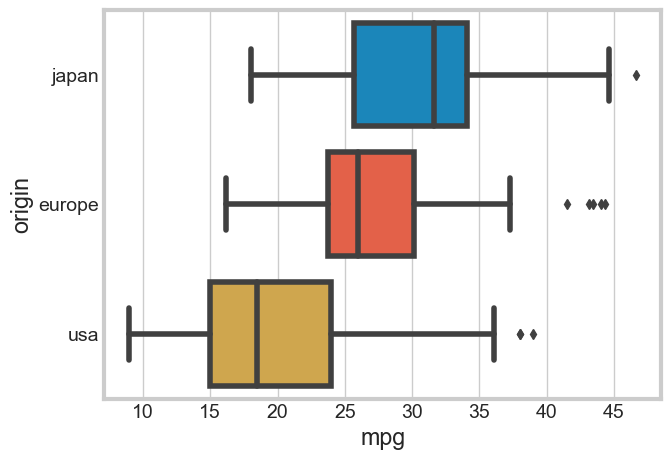

In [71]:
sns.boxplot(x=data.mpg, y=data.origin, order=["japan", "europe", "usa"]);

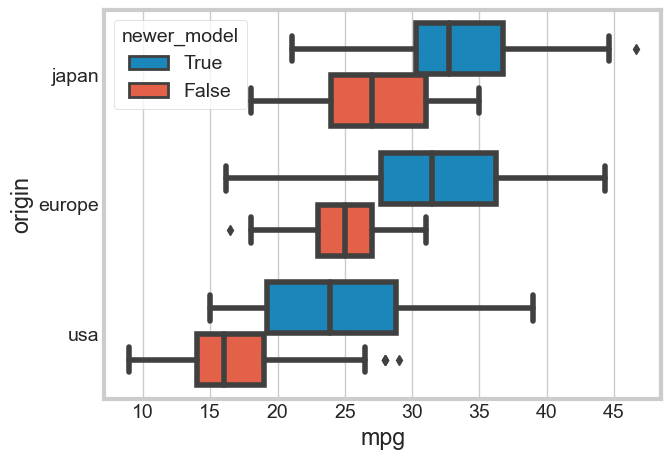

In [72]:
sns.boxplot(x=data.mpg, y=data.origin, hue=data.newer_model, order=["japan", "europe", "usa"], hue_order=[True, False]);

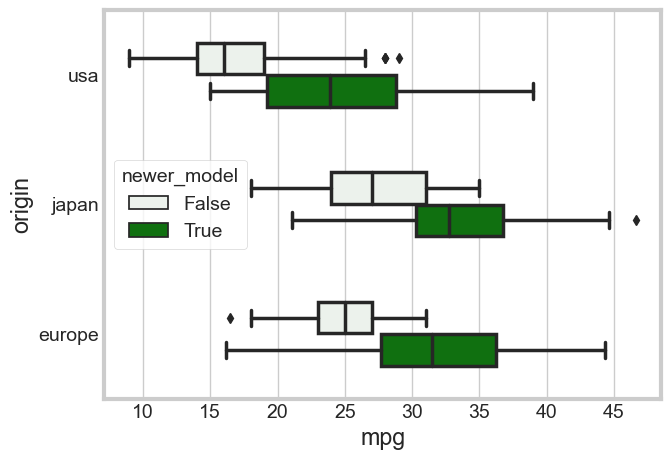

In [73]:
sns.boxplot(x=data.mpg, y=data.origin, hue=data.newer_model, color="green", width=0.5, linewidth=2.5);

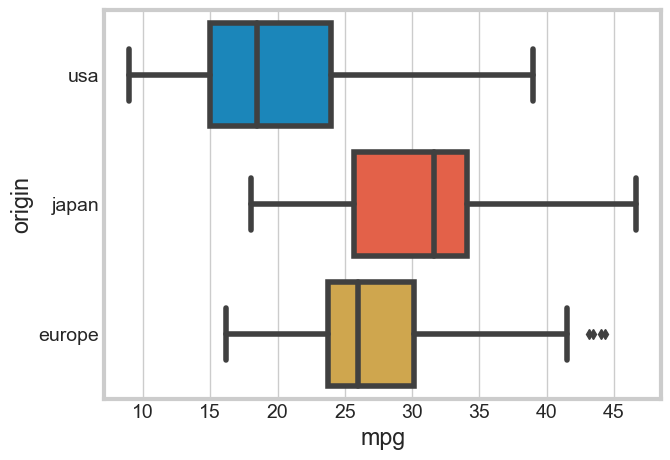

In [74]:
sns.boxplot(x=data.mpg, y=data.origin, whis=2); # the term whis is the length of the whiskers and it is 1.5 by default

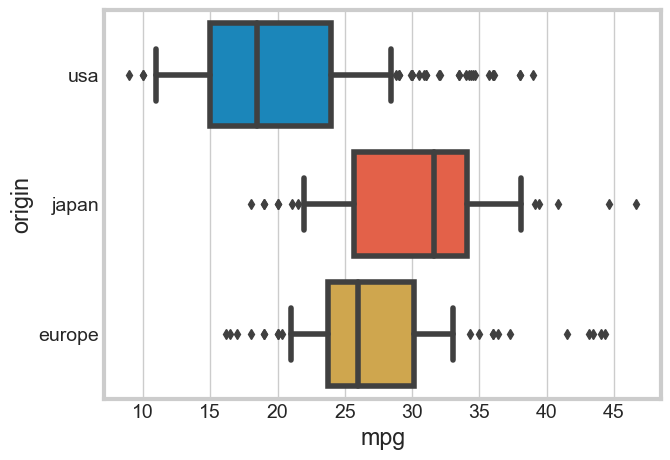

In [75]:
sns.boxplot(x=data.mpg, y=data.origin, whis=0.5);

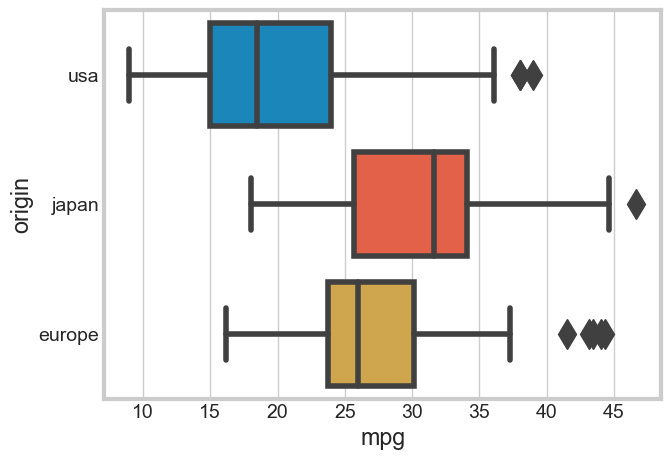

In [76]:
sns.boxplot(x=data.mpg, y=data.origin, fliersize=15); # the size of the outliers

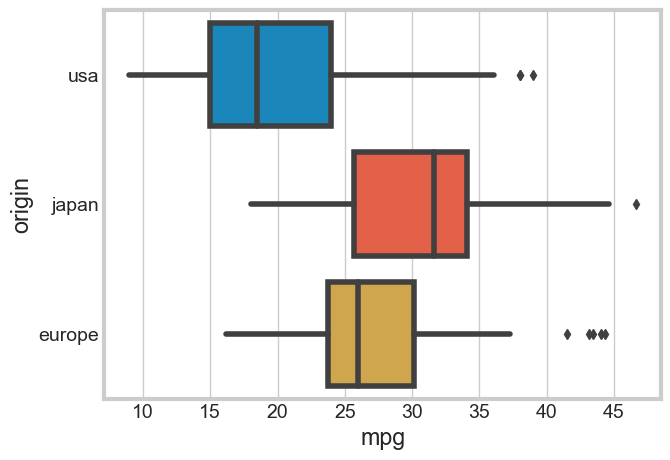

In [77]:
sns.boxplot(x=data.mpg, y=data.origin, showcaps=False); # no caps on the whiskers

# Scatter plot

We will need diamonds dataset from seaborn library. 

In [78]:
diamond = sns.load_dataset("diamonds")
diamond.shape

(53940, 10)

In [79]:
diamond.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [80]:
df = diamond.sample(n=100, random_state=20)
df.shape

(100, 10)

In [81]:
sns.set_style("dark")

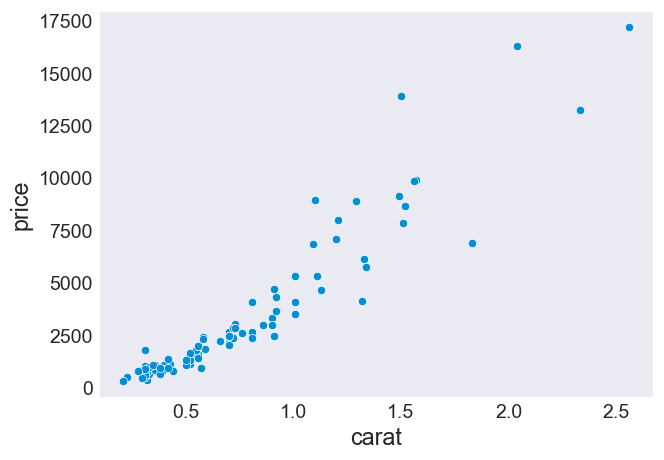

In [82]:
sns.scatterplot(x="carat", y="price", data=df);

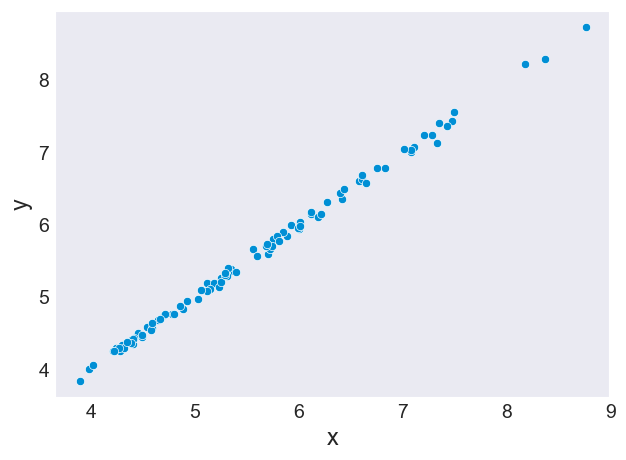

In [83]:
sns.scatterplot(x="x", y="y", data=df);

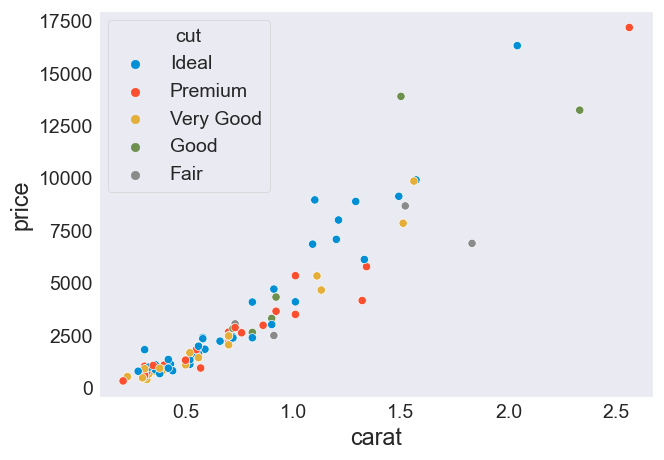

In [84]:
sns.scatterplot(x="carat", y="price", data=df, hue="cut");

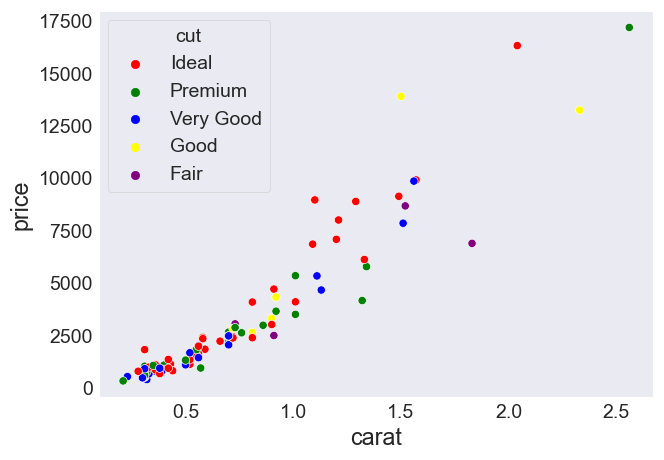

In [85]:
sns.scatterplot(x="carat", y="price", data=df, hue="cut", palette=["red", "green", "blue", "yellow", "purple"]);

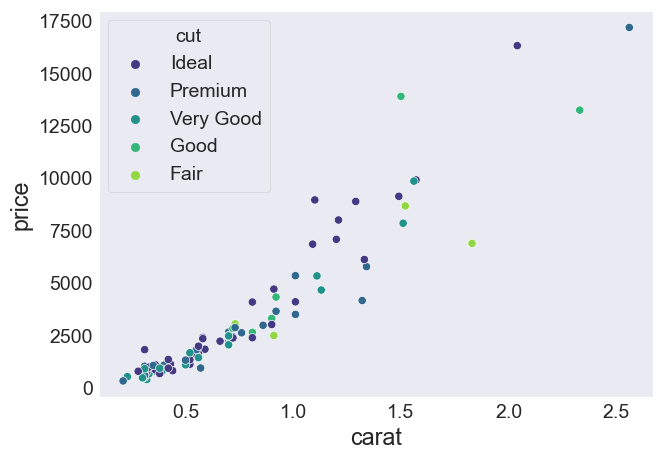

In [86]:
sns.scatterplot(x="carat", y="price", data=df, hue="cut", palette="viridis");

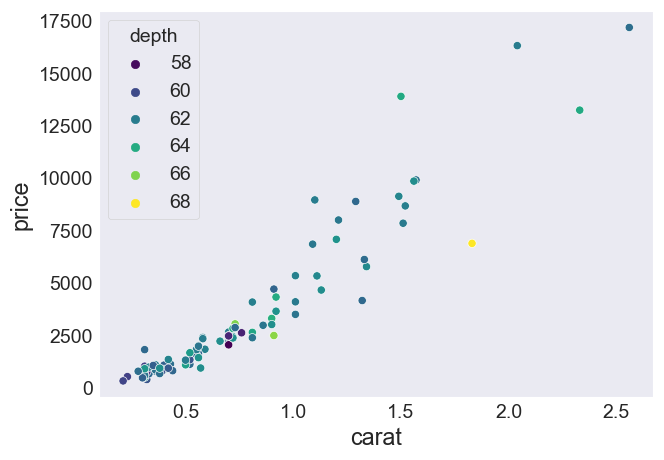

In [87]:
# hue for continuous variable
sns.scatterplot(x="carat", y="price", data=df, hue="depth", palette="viridis");

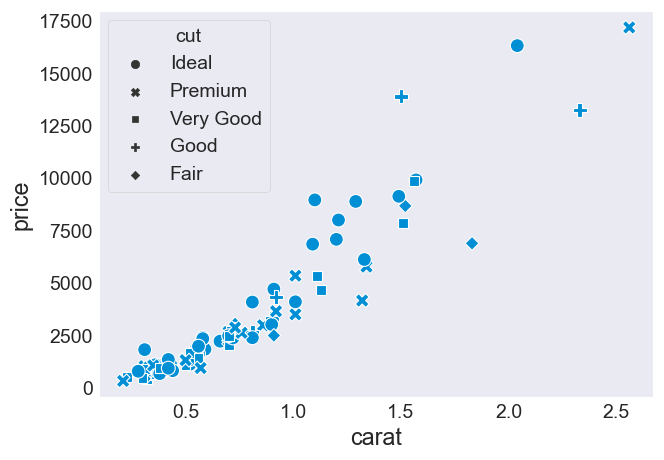

In [88]:
sns.scatterplot(x="carat", y="price", data=df, s=100, style='cut'); # size of the points

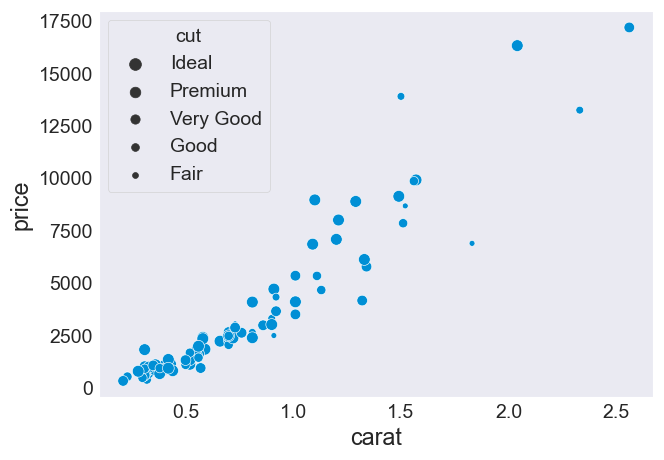

In [89]:
sns.scatterplot(x="carat", y="price", data=df, size='cut'); # we can add size of the classes by using sizes=[]

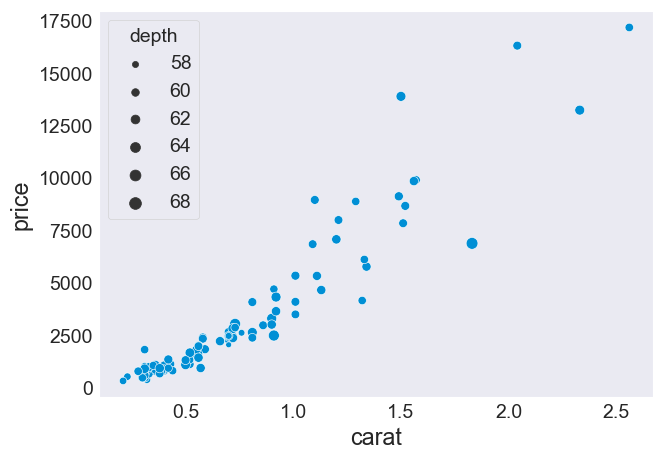

In [90]:
sns.scatterplot(x="carat", y="price", data=df, size='depth');

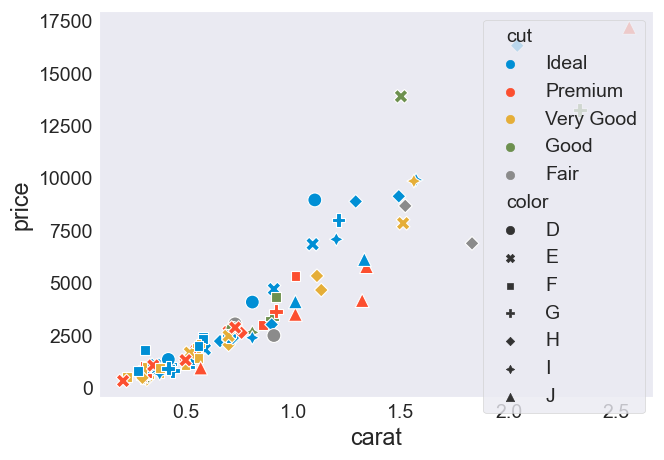

In [91]:
sns.scatterplot(x="carat", y="price", data=df, style='color', hue='cut', s=100);

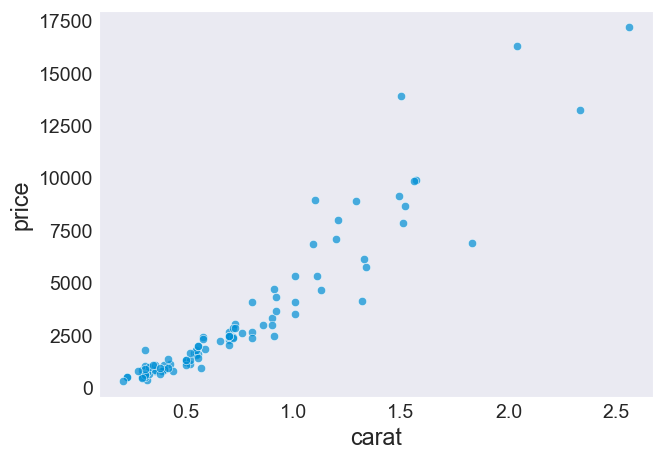

In [92]:
sns.scatterplot(x="carat", y="price", data=df, alpha=0.7);

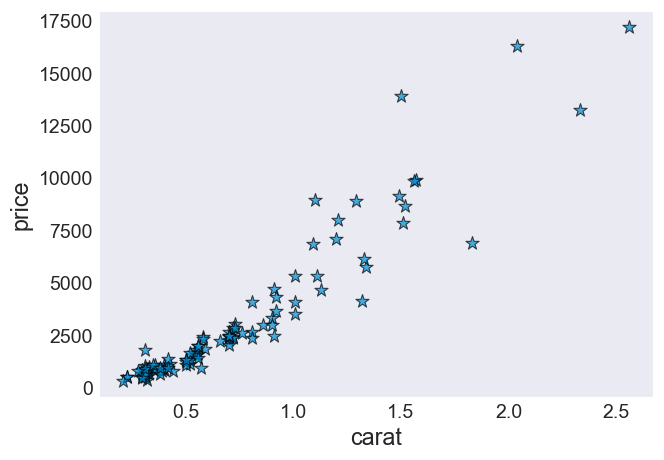

In [93]:
sns.scatterplot(x="carat", y="price", data=df, s = 100, alpha=0.7, marker='*', edgecolor='black');

# Line plot

- Grab parking data from [UCI resource](https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham) with Bash commands and read in as `pandas` DataFrame.

In [2]:
parking = pd.read_csv("datasets/dataset_seaborn.csv")
parking.shape

(35717, 4)

In [95]:
parking.head()

SystemCodeNumber  Capacity  Occupancy          LastUpdated
0      BHMBCCMKT01       577         61  2016-10-04 07:59:42
1      BHMBCCMKT01       577         64  2016-10-04 08:25:42
2      BHMBCCMKT01       577         80  2016-10-04 08:59:42
3      BHMBCCMKT01       577        107  2016-10-04 09:32:46
4      BHMBCCMKT01       577        150  2016-10-04 09:59:48

In [96]:
parking.rename(columns={"SystemCodeNumber": "Location", "LastUpdated": "Timestamp"}, inplace=True)
parking['Day'] = pd.to_datetime(parking['Timestamp']).dt.date
parking['Month'] = pd.to_datetime(parking['Timestamp']).dt.month
parking['Year'] = pd.to_datetime(parking['Timestamp']).dt.year
parking['Hour'] = pd.to_datetime(parking['Timestamp']).dt.hour
parking.head()

Location  Capacity  Occupancy            Timestamp         Day  Month  \
0  BHMBCCMKT01       577         61  2016-10-04 07:59:42  2016-10-04     10   
1  BHMBCCMKT01       577         64  2016-10-04 08:25:42  2016-10-04     10   
2  BHMBCCMKT01       577         80  2016-10-04 08:59:42  2016-10-04     10   
3  BHMBCCMKT01       577        107  2016-10-04 09:32:46  2016-10-04     10   
4  BHMBCCMKT01       577        150  2016-10-04 09:59:48  2016-10-04     10   

   Year  Hour  
0  2016     7  
1  2016     8  
2  2016     8  
3  2016     9  
4  2016     9

In [97]:
park = parking[parking.Location.isin(['Broad Street', 'NIA South'])]
print(park.shape)
park.head()

(2516, 8)


Location  Capacity  Occupancy            Timestamp         Day  \
20171  Broad Street       690        178  2016-10-04 07:59:42  2016-10-04   
20172  Broad Street       690        269  2016-10-04 08:25:42  2016-10-04   
20173  Broad Street       690        415  2016-10-04 08:59:42  2016-10-04   
20174  Broad Street       690        530  2016-10-04 09:32:46  2016-10-04   
20175  Broad Street       690        600  2016-10-04 09:59:48  2016-10-04   

       Month  Year  Hour  
20171     10  2016     7  
20172     10  2016     8  
20173     10  2016     8  
20174     10  2016     9  
20175     10  2016     9

In [98]:
sns.set_style("dark")

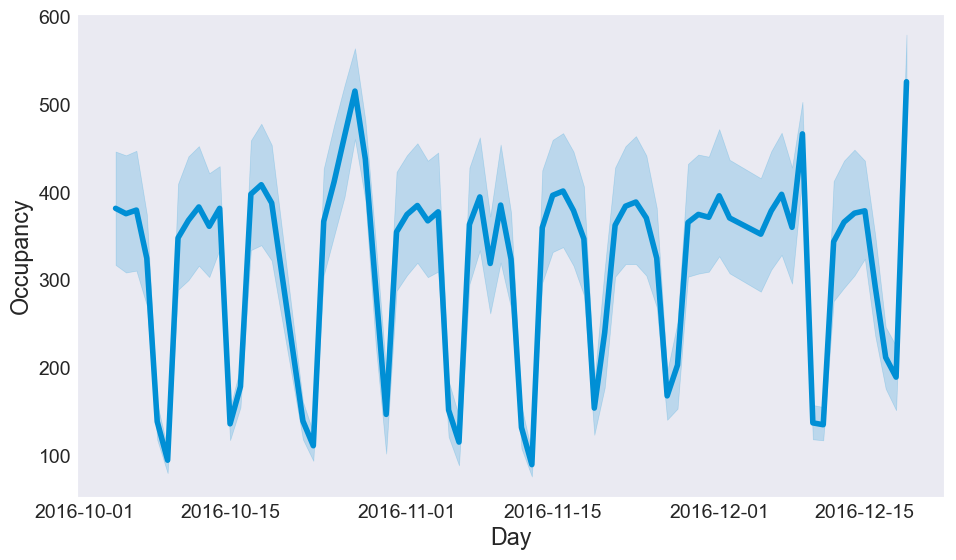

In [99]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park);

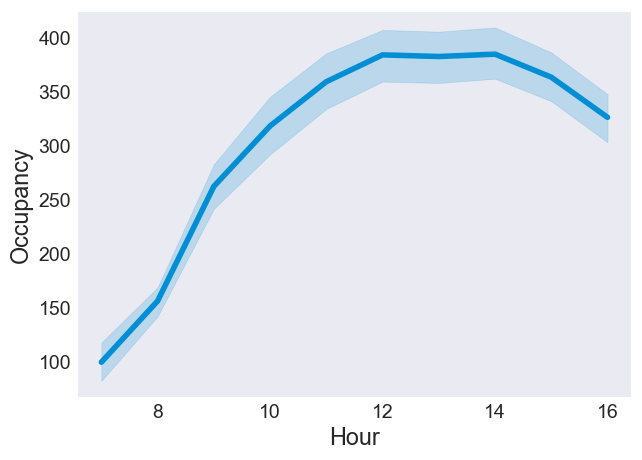

In [100]:
sns.lineplot(x="Hour", y="Occupancy", data=park);

## Confidence Interval and Bootstrapping

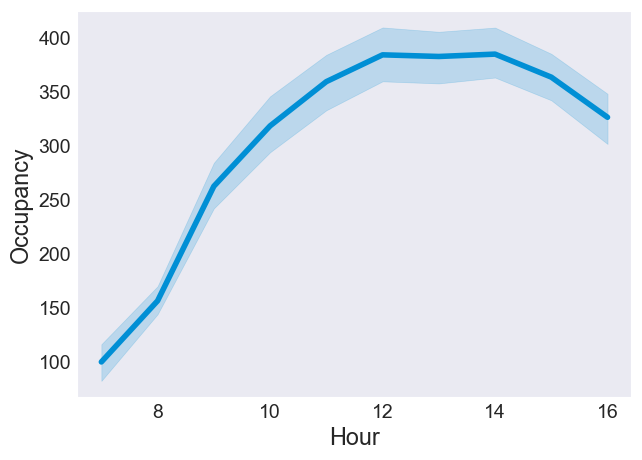

In [101]:
sns.lineplot(x="Hour", y="Occupancy", data=park, n_boot=1000); # default number of bootstraps
## the reslut will be the same every time we run the code as we have a large number of bootstraps

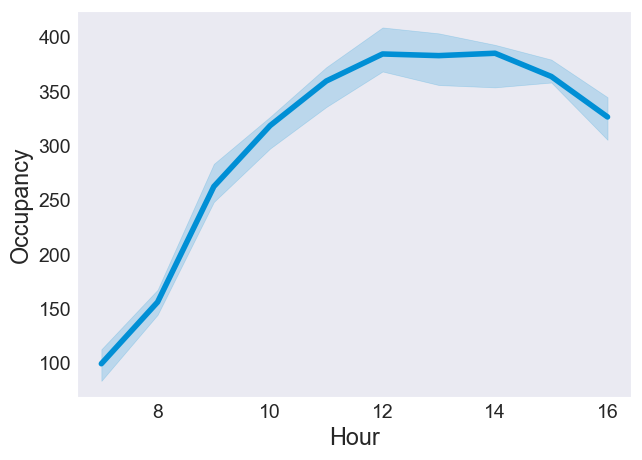

In [102]:
sns.lineplot(x="Hour", y="Occupancy", data=park, n_boot=10);
# the result will differ every time we run this as we have only 10 bootstraps

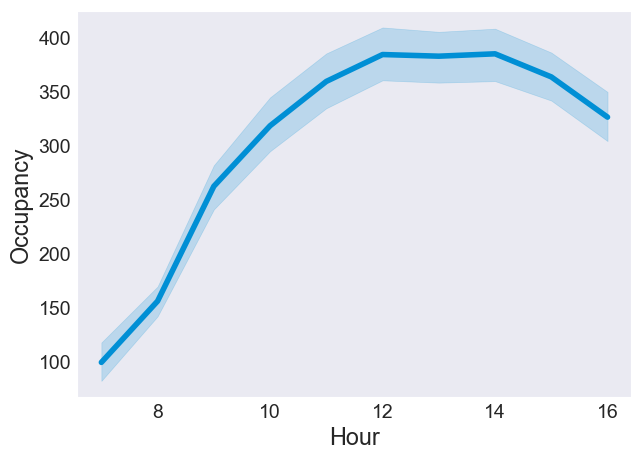

In [103]:
sns.lineplot(x="Hour", y="Occupancy", data=park, ci=95); # default confidence interval is 95%

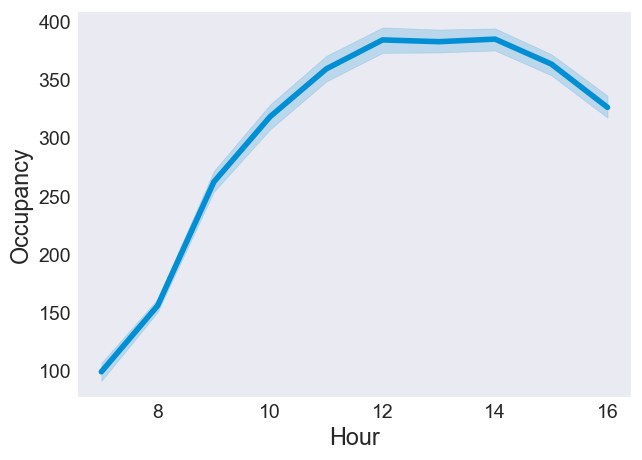

In [104]:
sns.lineplot(x="Hour", y="Occupancy", data=park, ci=60);

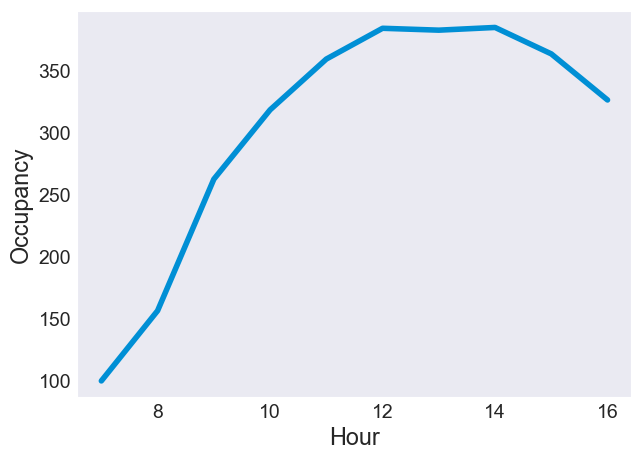

In [105]:
sns.lineplot(x="Hour", y="Occupancy", data=park, ci=None); # no confidence interval

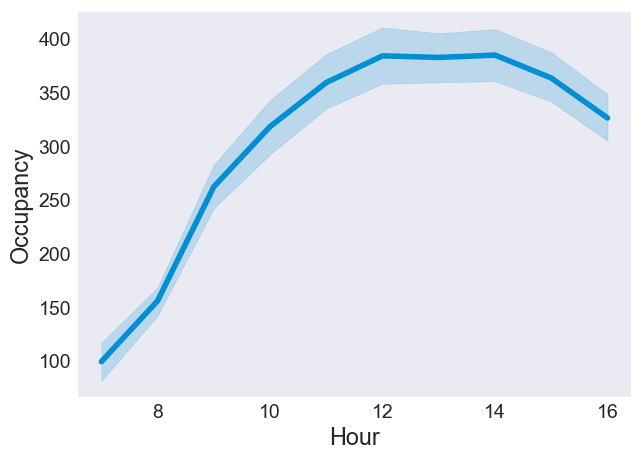

In [106]:
sns.lineplot(x="Hour", y="Occupancy", data=park, estimator="mean"); # default

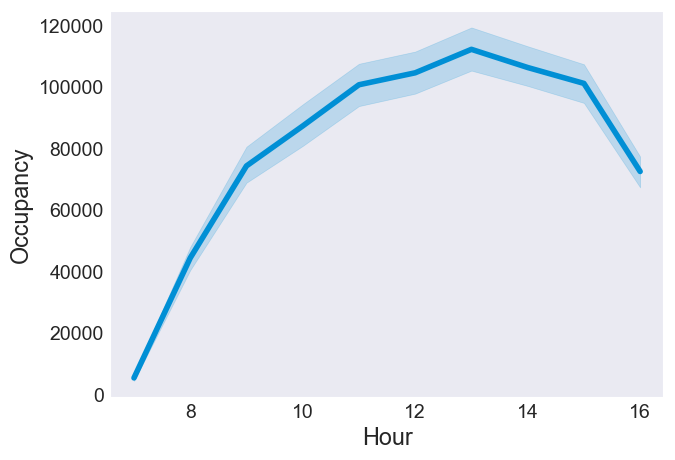

In [107]:
sns.lineplot(x="Hour", y="Occupancy", data=park, estimator="sum");

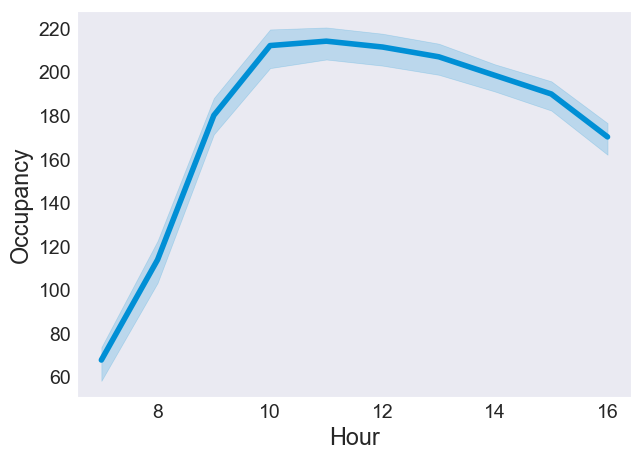

In [108]:
sns.lineplot(x="Hour", y="Occupancy", data=park, estimator="std");

## Visual semantics

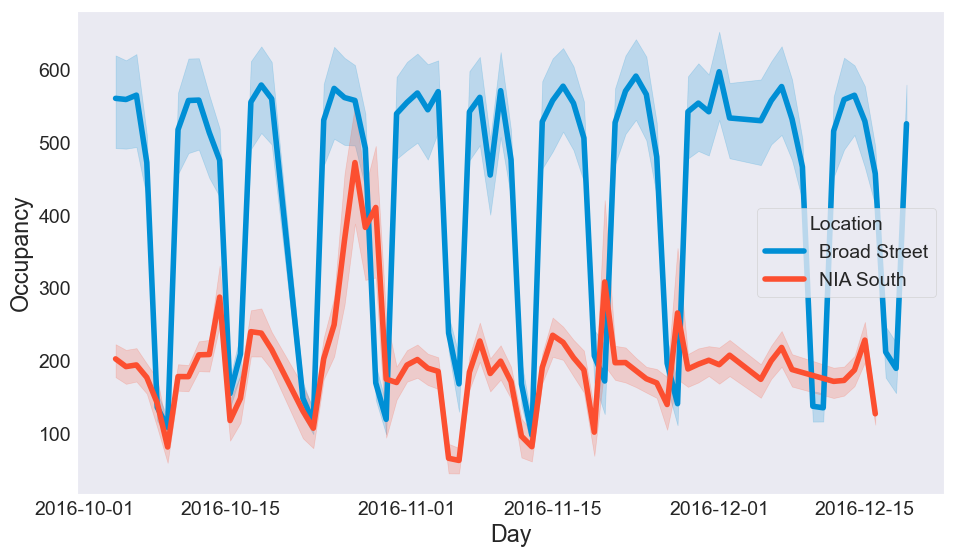

In [109]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park, hue="Location");

- xkcd is is a popular web comic created by Randall Munroe.
- His "Color Name Survey" (with 200 000 participants) resulted in a list of nearly 1000 color names which is super cool.

You can access it [here](https://www.w3schools.com/colors/colors_xkcd.asp)

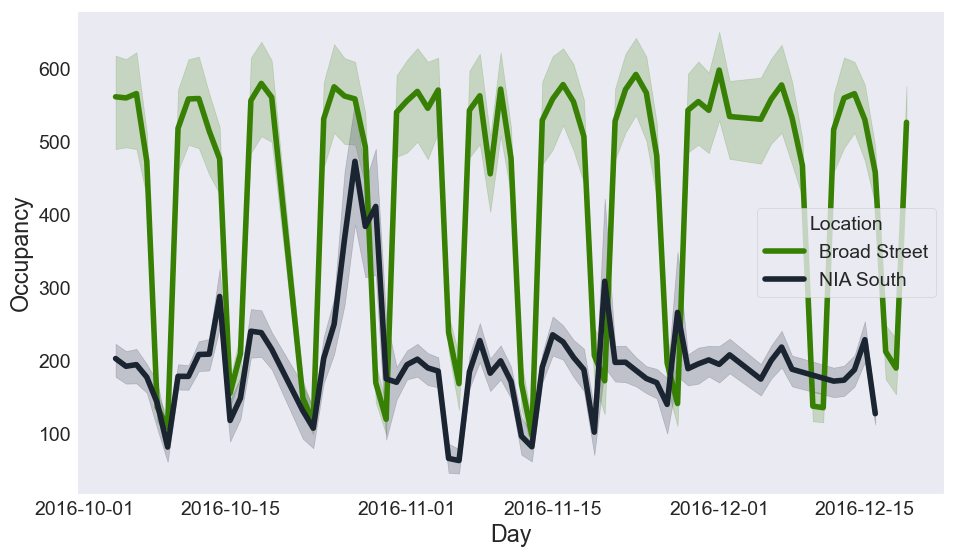

In [110]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park, hue="Location", palette=["xkcd:dark grass green", "xkcd:dark"]);

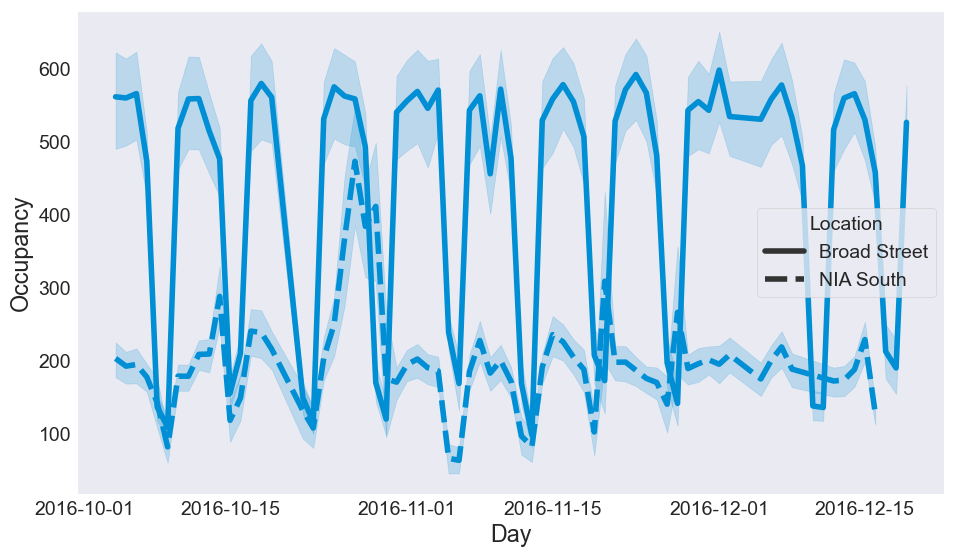

In [111]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park, style="Location");

KeyboardInterrupt: 

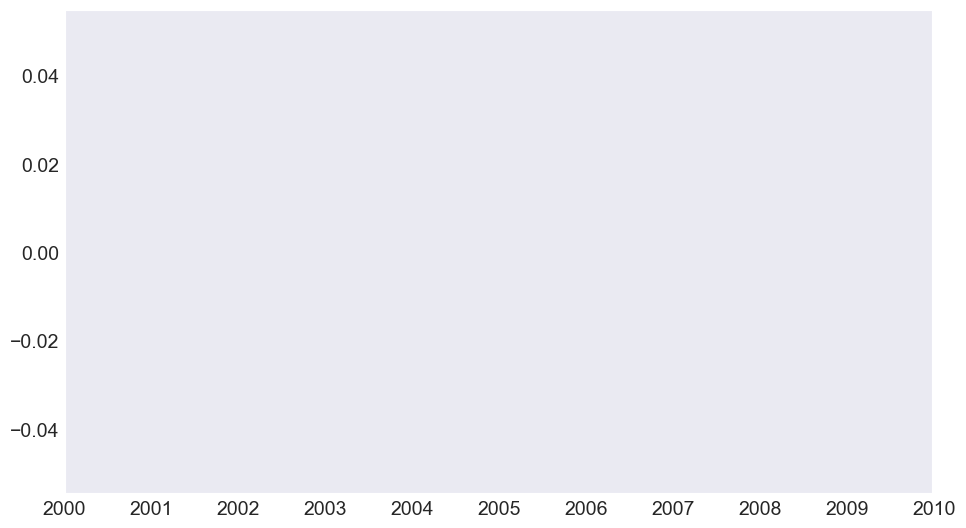

In [112]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park, hue="Location", style="Location");

In [ ]:
sns.lineplot(x="Hour", y="Occupancy", data=park, size="Location");

In [ ]:
sns.lineplot(x="Hour", y="Occupancy", data=park, size="Month", ci=None);

### Styles inherited from Matplotlib

In [ ]:
sns.lineplot(x="Hour", y="Occupancy", data=park, lw=5);

In [ ]:
sns.lineplot(x="Hour", y="Occupancy", data=park, lw=5, marker='o');

In [ ]:
sns.lineplot(x="Hour", y="Occupancy", data=park, lw=4, color='red'); # you can put any other formats of colors like hex

In [ ]:
sns.lineplot(x="Hour", y="Occupancy", data=park, lw=4, color='red', alpha=0.4); # transparency

# Heatmap

In [ ]:
# we will use mpg dataset we used earlier which labeled 'data'
cars = data
cars.head()

In [ ]:
cars.groupby(cars.origin).cylinders.value_counts()

In [ ]:
origin_cyl = cars.groupby(cars.origin).cylinders.value_counts().unstack().fillna(0)

In [ ]:
sns.heatmap(origin_cyl); # we can use numpy arrays as well

In [ ]:
sns.heatmap(origin_cyl.T);

In [ ]:
numerics = ['int', 'float']
cars_num = cars.select_dtypes(include=numerics)
cars_num.corr()

In [ ]:
sns.heatmap(cars_num.corr());

## Color palette for heatmap

In [ ]:
sns.heatmap(cars_num.corr(), cmap='Blues');

In [ ]:
sns.heatmap(cars_num.corr(), cmap='RdBu', center=0); # to center the 0 on white color

In [ ]:
sns.heatmap(cars_num.corr(), cmap='RdBu', vmin=-1, vmax=1);

## Anonotations

In [ ]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True);

In [ ]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt='0.1f'); # the format of the annot text

In [ ]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt='.0f', 
            annot_kws={
                'fontsize' : 12,
                'fontweight' : 'bold', 
                'fontfamily' : 'serif',
                'color' : 'darkblue'
            });

We can see that we losing information in the darkest regions, so we can leave it determined automatically by seaborn library.

In [ ]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt='.0f', 
            annot_kws={
                'fontsize' : 12,
                'fontweight' : 'bold', 
                'fontfamily' : 'serif'
            });

## Some styling

In [ ]:
sns.heatmap(cars_num.corr(), cmap='RdBu', linewidths=.5);

In [ ]:
sns.heatmap(cars_num.corr(), cmap='RdBu', linewidths=.5, linecolor='black');

In [ ]:
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
          'Weight', 'Acceleration', 'Model Year']

sns.heatmap(cars_num.corr(), cmap='RdBu',
           xticklabels=labels,
            yticklabels=labels
           );

In [ ]:
sns.heatmap(cars_num.corr(), cmap='RdBu',
           xticklabels=False,
            yticklabels=labels
           );

In [ ]:
sns.heatmap(origin_cyl, cmap='Reds',
           square=True
           );
# now we have perfect squares no matter elements are in the heatmap

# Bar plot

- In barplots we have one categorical variable and one numeric variable. 

First we will need to grab penguins data from seaborn library.

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.head()

In [ ]:
penguins.shape

In [ ]:
sns.set_style('darkgrid')

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins);

In [ ]:
penguins.groupby('species').body_mass_g.mean()

So what happened in the barplot that it grouped by species column and calculated the mean and this was the result.

In [ ]:
sns.barplot(y='species', x='body_mass_g', data=penguins); # to make it horizontally

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins, ci=95); # the default of confidence interval

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins, ci=None);

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins,
           estimator=np.std
           );

In [ ]:
penguins.groupby('species').body_mass_g.describe()

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins,
           estimator=np.max);

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins, hue='sex'); # 2 categorical variables

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins,
           order=['Gentoo', 'Chinstrap', 'Adelie']
           );

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins,
           order=['Gentoo', 'Chinstrap', 'Adelie'],
            hue = 'sex',
            hue_order=['Female', 'Male']
           );

## Some styling

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins, color='c');

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            color='c',
            errcolor='darkblue',
            errwidth=7
           );

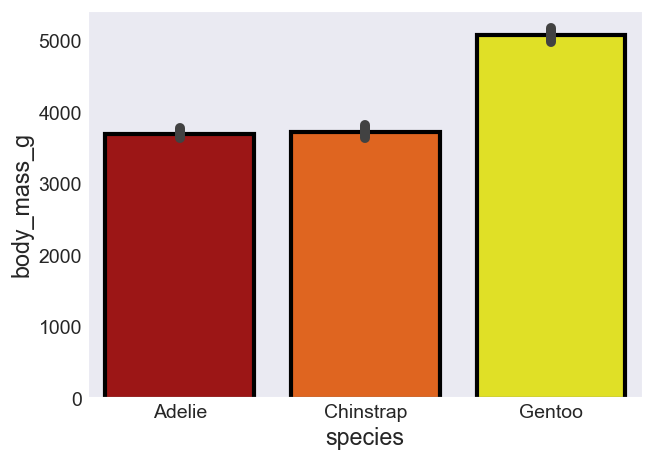

In [113]:
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            palette='hot',
            edgecolor='black',
            lw=3
           );

# Count plot

We will need diamond dataset in this topic.

In [114]:
dmnd = sns.load_dataset("diamonds")
dmnd.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [115]:
dmnd = dmnd[dmnd.clarity.isin(['SI1', 'VS2'])]

In [116]:
print(dmnd.shape)
dmnd.head()

(25323, 10)


carat        cut color clarity  depth  table  price     x     y     z
1    0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
7    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8    0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
10   0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73

In [117]:
dmnd.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [118]:
sns.set_style('darkgrid')

In [119]:
dmnd.color.value_counts()

E    4896
F    4332
G    4323
H    3918
D    3780
I    2593
J    1481
Name: color, dtype: int64

In [120]:
dmnd.color.cat.categories

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

So it will be ordered the same as the categories:

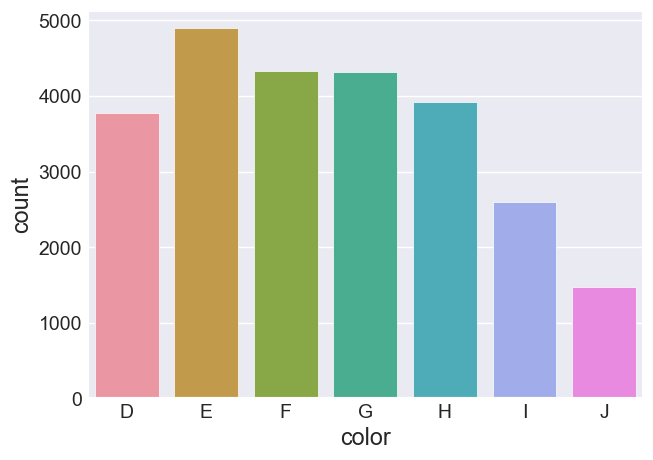

In [121]:
sns.countplot(x='color', data=dmnd);

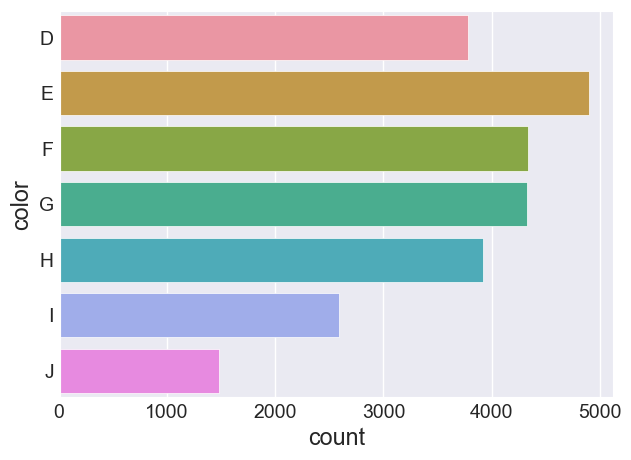

In [122]:
sns.countplot(y='color', data=dmnd);

In [123]:
dmnd.cut.cat.categories

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

It will be also ordered the same as the categories:

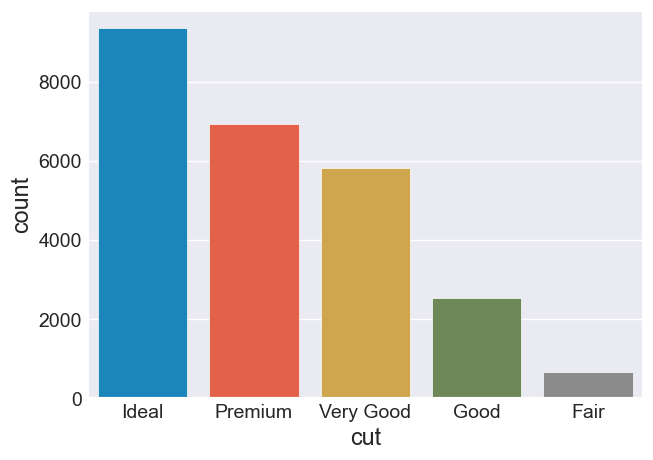

In [124]:
sns.countplot(x='cut', data=dmnd);

## Ordering

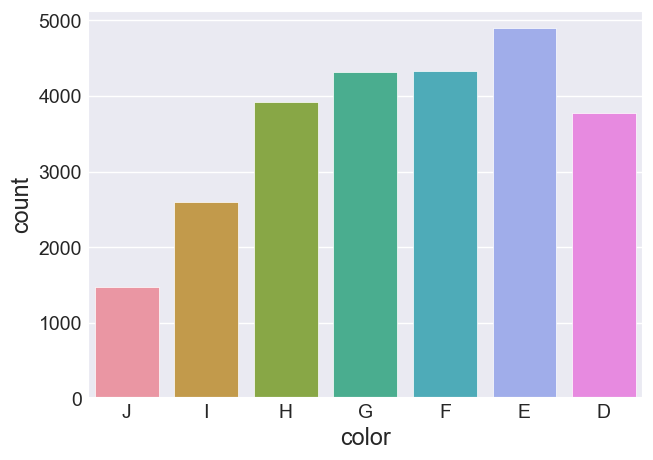

In [125]:
sns.countplot(x='color', data=dmnd,
             order=['J', 'I', 'H', 'G', 'F', 'E', 'D']
             );

And to order ascending or descending:

In [126]:
dmnd.color.value_counts()

E    4896
F    4332
G    4323
H    3918
D    3780
I    2593
J    1481
Name: color, dtype: int64

In [127]:
dmnd.color.value_counts().index

CategoricalIndex(['E', 'F', 'G', 'H', 'D', 'I', 'J'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False, dtype='category')

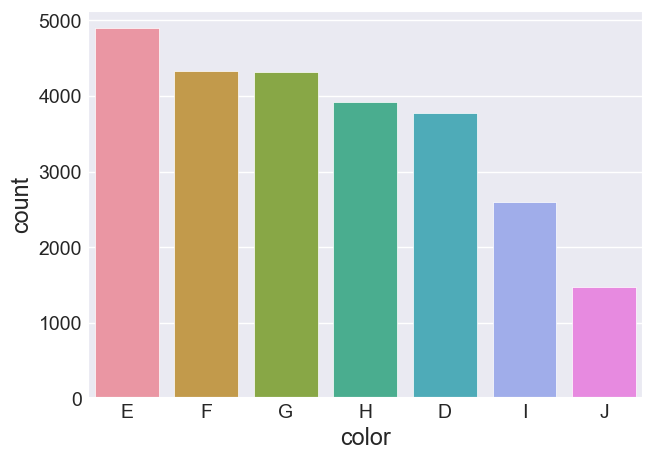

In [128]:
# descending
sns.countplot(x='color', data=dmnd, 
             order=dmnd.color.value_counts().index
             );

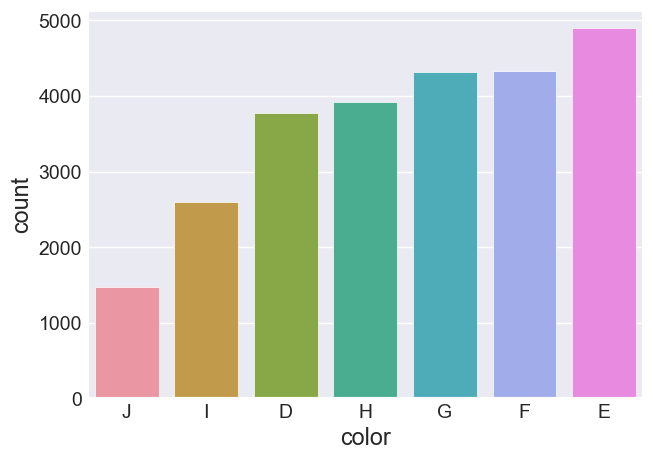

In [129]:
# ascending
sns.countplot(x='color', data=dmnd, 
             order=dmnd.color.value_counts().index[::-1]
             );

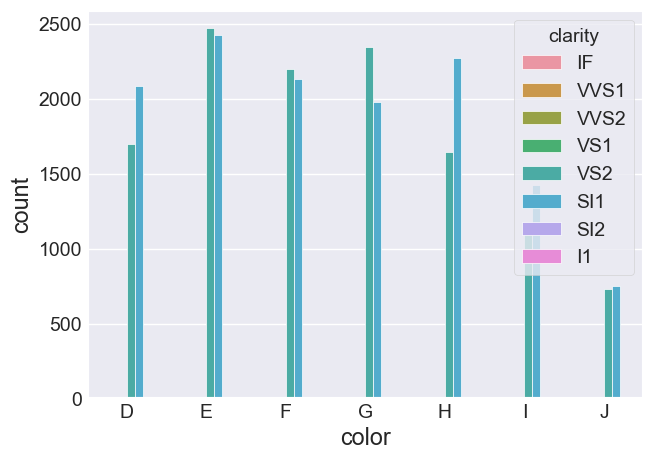

In [130]:
sns.countplot(x='color', data=dmnd, hue='clarity');

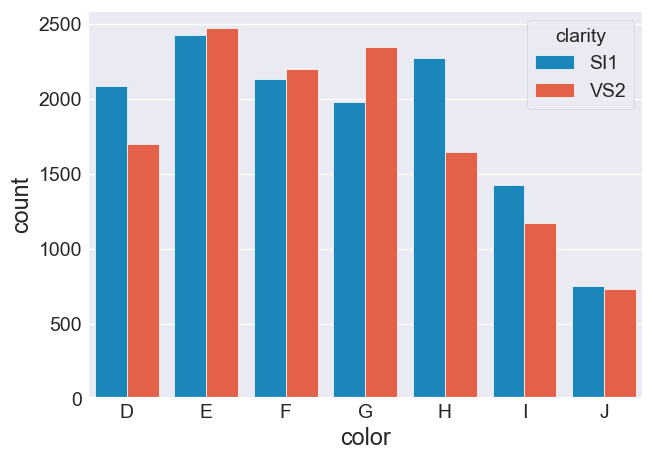

In [131]:
# to fix this we can do:
sns.countplot(x='color', data=dmnd, hue='clarity', hue_order=['SI1', 'VS2']);

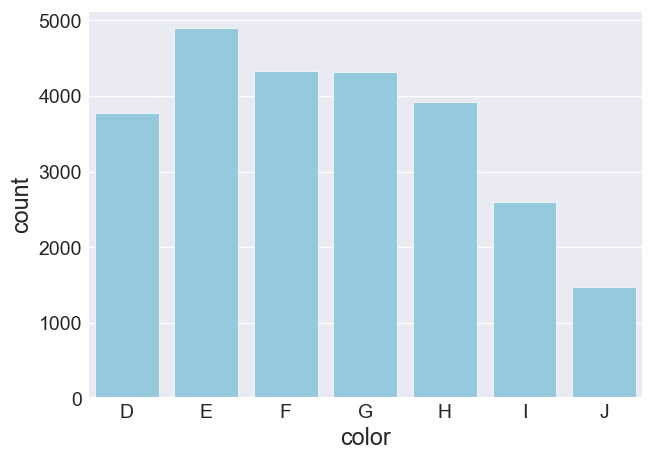

In [132]:
sns.countplot(x='color', data=dmnd, color='skyblue');

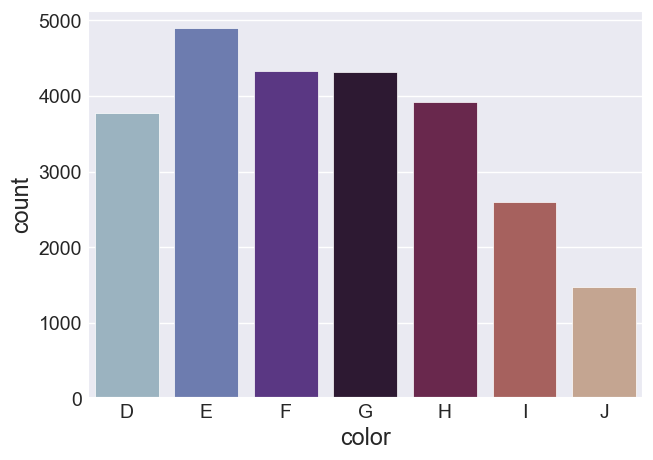

In [133]:
sns.countplot(x='color', data=dmnd, palette='twilight');

All styling things we did previously with barplots, we can do it here as well.

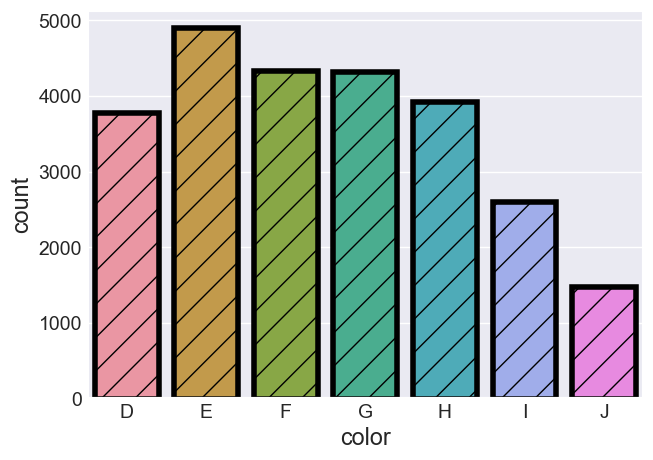

In [134]:
sns.countplot(x='color', data=dmnd, 
              edgecolor='black', lw=4, hatch='/'
             );

# Color palette

This is the section where your creativity works.

In [135]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [136]:
sns.set_style('whitegrid')

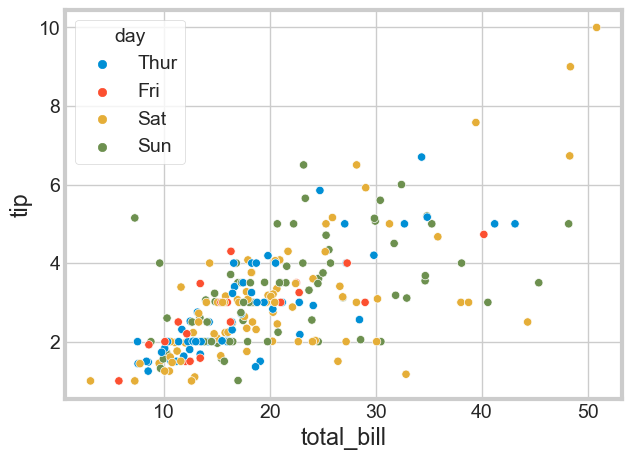

In [137]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day');

In [138]:
sns.color_palette() # the default color palette of seaborn

[(0.0, 0.5607843137254902, 0.8352941176470589),
 (0.9882352941176471, 0.30980392156862746, 0.18823529411764706),
 (0.8980392156862745, 0.6823529411764706, 0.2196078431372549),
 (0.42745098039215684, 0.5647058823529412, 0.30980392156862746),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

In [139]:
sns.color_palette('terrain')

[(0.011764705882352955, 0.5764705882352941, 0.9764705882352941),
 (0.1450980392156863, 0.8290196078431373, 0.42901960784313725),
 (0.7098039215686275, 0.9419607843137255, 0.5419607843137255),
 (0.8549019607843137, 0.8142745098039216, 0.5216470588235294),
 (0.5725490196078431, 0.45286274509803925, 0.36917647058823533),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294)]

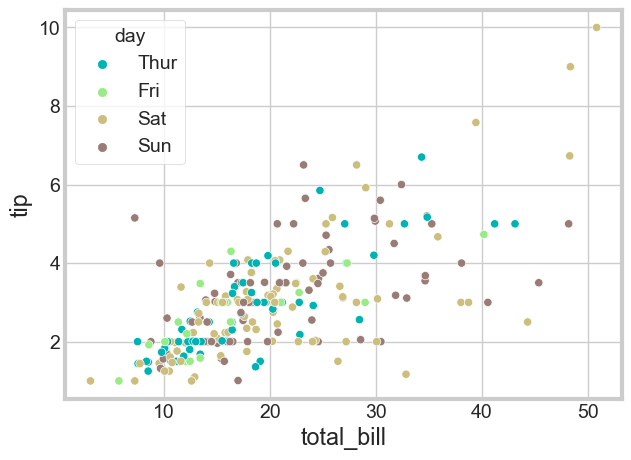

In [140]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day', palette='terrain');

There are 170 color palettes in seaborn library and you can see them all in this [post](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f).

In [141]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day', palette='k'); #error expected

ValueError: k is not a valid palette name

Now you can see all available palettes in the error message.
- Palettes ending in "_r" are the same palette but in reversed order.

In [142]:
sns.color_palette('terrain_r')

[(0.7176470588235294, 0.6385882352941177, 0.6216470588235294),
 (0.5725490196078431, 0.4528627450980392, 0.36917647058823533),
 (0.8549019607843138, 0.8142745098039216, 0.5216470588235294),
 (0.7098039215686274, 0.9419607843137255, 0.5419607843137255),
 (0.14509803921568631, 0.8290196078431373, 0.4290196078431373),
 (0.011764705882352941, 0.5764705882352941, 0.9764705882352941)]

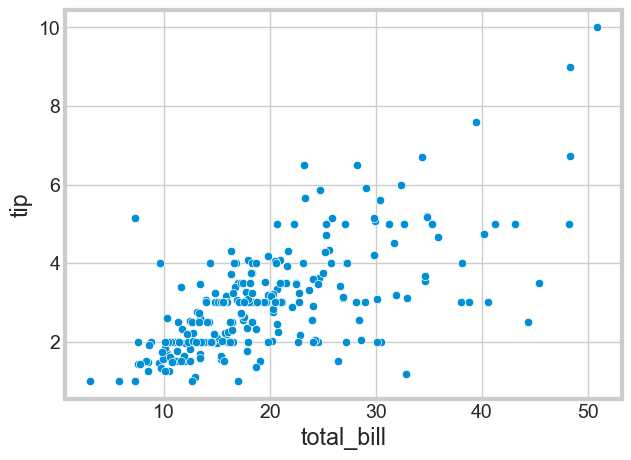

In [143]:
sns.scatterplot(x='total_bill', y='tip', data=tips);

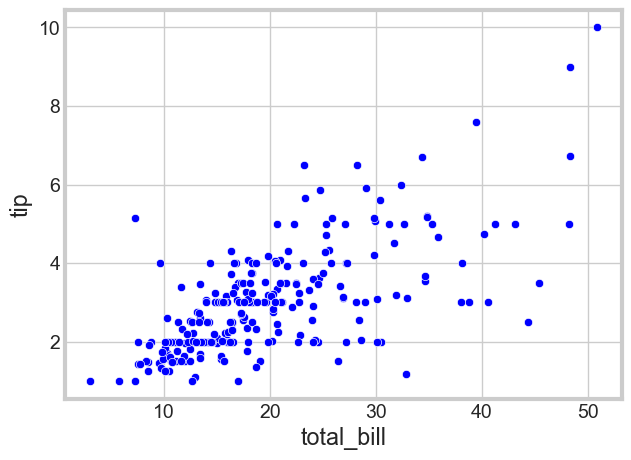

In [144]:
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue');
# It's matplotlib blue

In [145]:
sns.color_palette()

[(0.0, 0.5607843137254902, 0.8352941176470589),
 (0.9882352941176471, 0.30980392156862746, 0.18823529411764706),
 (0.8980392156862745, 0.6823529411764706, 0.2196078431372549),
 (0.42745098039215684, 0.5647058823529412, 0.30980392156862746),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

In [146]:
blue, orange = sns.color_palette()[:2]

In [147]:
blue

(0.0, 0.5607843137254902, 0.8352941176470589)

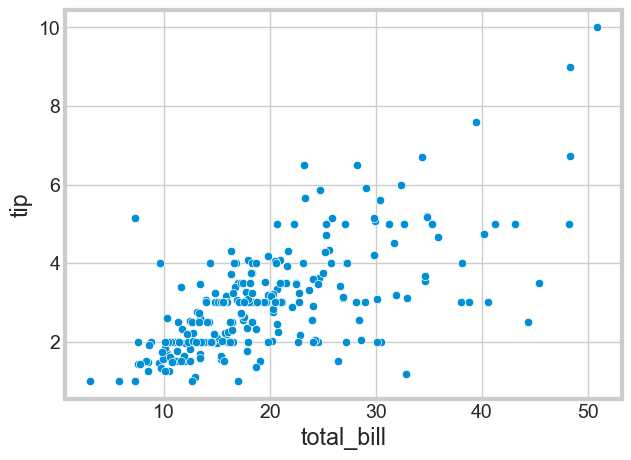

In [148]:
sns.scatterplot(x='total_bill', y='tip', data=tips, color=blue);
# now we have seaborn blue

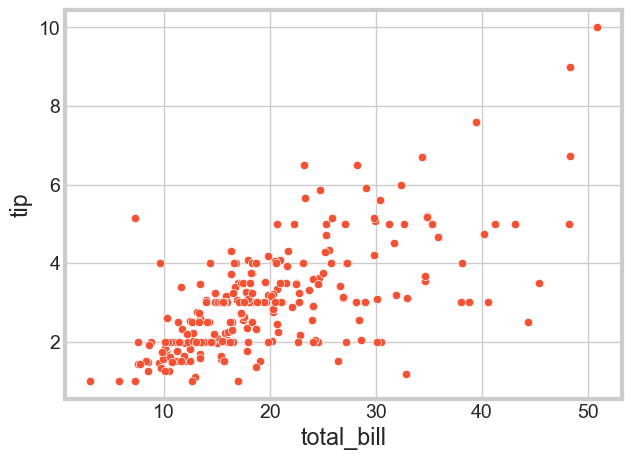

In [149]:
sns.scatterplot(x='total_bill', y='tip', data=tips, color=orange);

## Custom palettes

In [150]:
sns.color_palette('terrain', 10)

[(0.07973856209150328, 0.44052287581699345, 0.8405228758169935),
 (0.0, 0.6607843137254902, 0.8176470588235294),
 (0.08235294117647059, 0.8164705882352942, 0.41647058823529415),
 (0.4588235294117647, 0.891764705882353, 0.49176470588235294),
 (0.8196078431372549, 0.9639215686274509, 0.563921568627451),
 (0.9098039215686274, 0.8845490196078432, 0.5512941176470588),
 (0.7294117647058824, 0.6536470588235295, 0.4538823529411765),
 (0.5411764705882354, 0.41270588235294114, 0.3522352941176471),
 (0.6392156862745098, 0.5381960784313725, 0.5165490196078432),
 (0.8196078431372549, 0.7690980392156863, 0.7582745098039215)]

In [151]:
sns.color_palette('terrain', 4)

[(0.0, 0.7, 0.7),
 (0.6, 0.92, 0.52),
 (0.8, 0.744, 0.492),
 (0.6, 0.488, 0.46399999999999997)]

In [152]:
sns.light_palette('blue')

[(0.9427942677547513, 0.942825384792593, 0.9519953287278279),
 (0.754235414203801, 0.7542603078340744, 0.9615962629822623),
 (0.5656765606528508, 0.5656952308755558, 0.9711971972366967),
 (0.3771177071019005, 0.3771301539170372, 0.9807981314911312),
 (0.18855885355095026, 0.18856507695851854, 0.9903990657455656),
 (0.0, 0.0, 1.0)]

In [153]:
sns.dark_palette('blue')

[(0.14289171628325356, 0.14289583210240445, 0.19919851992384108),
 (0.11431337302660285, 0.11431666568192356, 0.3593588159390729),
 (0.08573502976995213, 0.08573749926144267, 0.5195191119543047),
 (0.05715668651330143, 0.05715833284096178, 0.6796794079695364),
 (0.028578343256650707, 0.02857916642048089, 0.8398397039847683),
 (0.0, 0.0, 1.0)]

In [154]:
sns.blend_palette(['blue', 'red'])

[(0.0, 0.0, 1.0),
 (0.2, 0.0, 0.8),
 (0.4, 0.0, 0.6),
 (0.6, 0.0, 0.4),
 (0.8, 0.0, 0.19999999999999996),
 (1.0, 0.0, 0.0)]

In [155]:
sns.blend_palette(['blue', 'red', 'yellow'], 10)

[(0.0, 0.0, 1.0),
 (0.2196078431372549, 0.0, 0.7803921568627451),
 (0.4392156862745098, 0.0, 0.5607843137254902),
 (0.6666666666666666, 0.0, 0.33333333333333337),
 (0.8862745098039215, 0.0, 0.11372549019607847),
 (1.0, 0.11372549019607843, 0.0),
 (1.0, 0.3333333333333333, 0.0),
 (1.0, 0.5607843137254902, 0.0),
 (1.0, 0.7803921568627451, 0.0),
 (1.0, 1.0, 0.0)]

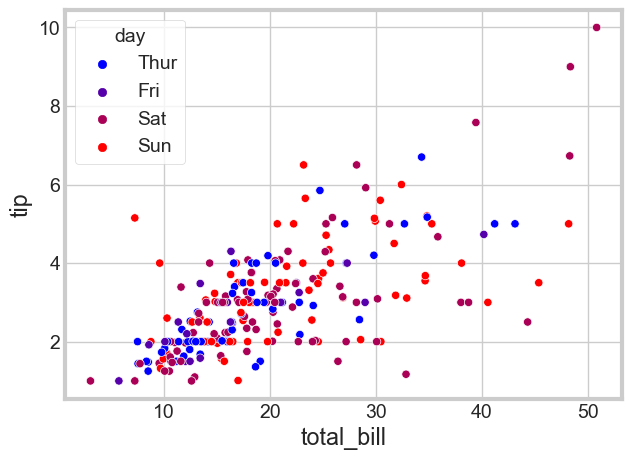

In [156]:
sns.scatterplot(x='total_bill', 
                y='tip', 
                data=tips, 
                hue='day',
                palette=sns.blend_palette(['blue', 'red'], 4)
               );
# you must specify number of colors in the palette with regard for the categoris in your data
# otherwise you will get an error

In [157]:
palette_dict = {x: 'gray' for x in tips.day.unique()}

In [158]:
palette_dict

{'Sun': 'gray', 'Sat': 'gray', 'Thur': 'gray', 'Fri': 'gray'}

In [159]:
palette_dict['Sat'] = 'crimson'

In [160]:
palette_dict

{'Sun': 'gray', 'Sat': 'crimson', 'Thur': 'gray', 'Fri': 'gray'}

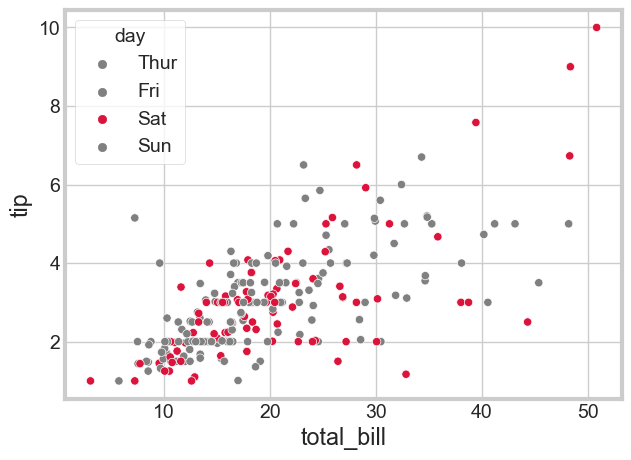

In [161]:
sns.scatterplot(x='total_bill', y='tip', data=tips, 
                hue='day', 
                palette=palette_dict
               );

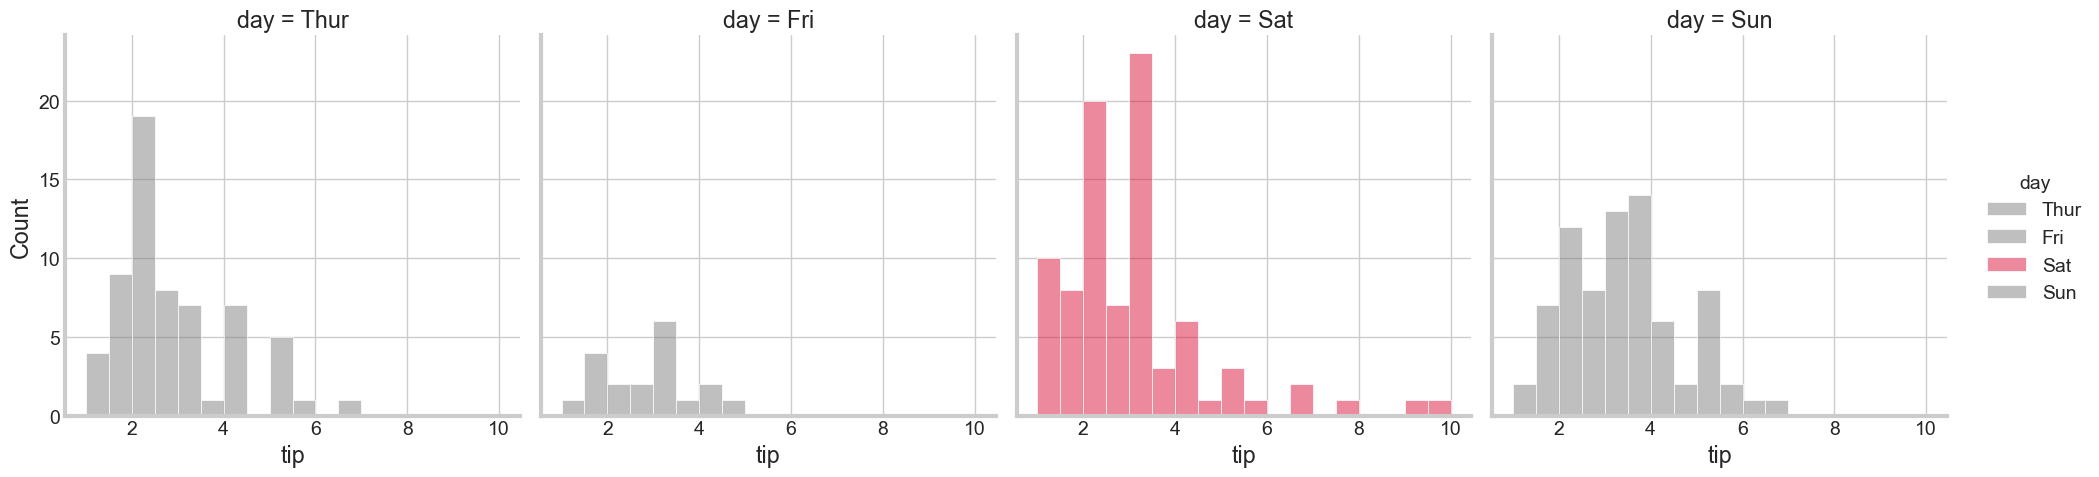

In [162]:
sns.displot(x='tip', data=tips, 
            hue='day', 
            col='day', 
            palette=palette_dict
           );

# Violin plot

The violin plot is a combination of boxplot and KDE plot.

In [163]:
cars = sns.load_dataset("mpg").dropna()

cars.shape

(392, 9)

In [164]:
cars.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [165]:
sns.set_style("whitegrid")

In [166]:
cars.value_counts("cylinders")

cylinders
4    199
8    103
6     83
3      4
5      3
dtype: int64

In [167]:
cars_filtered = cars[cars.cylinders.isin([4, 6, 8])]

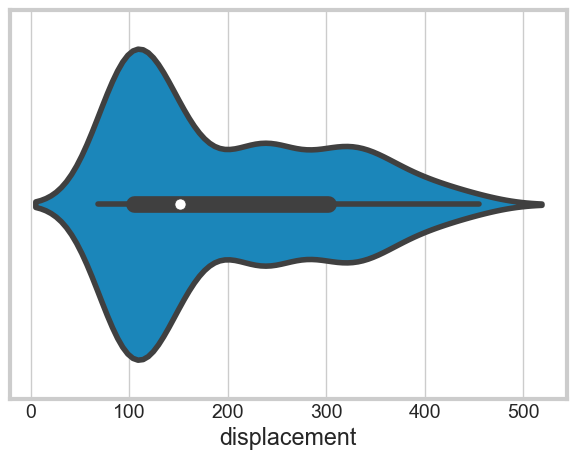

In [168]:
sns.violinplot(x="displacement", data=cars_filtered);

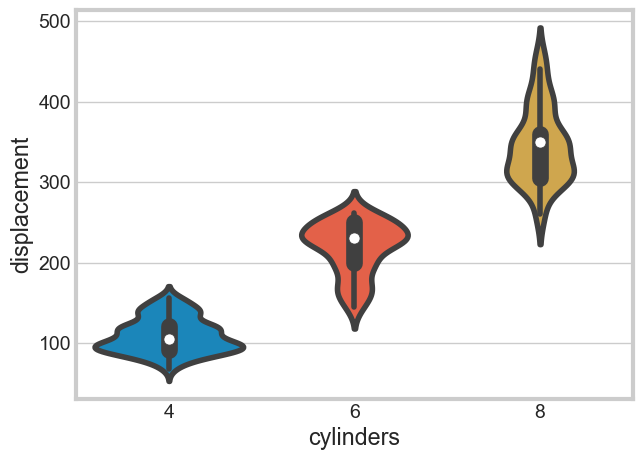

In [169]:
sns.violinplot(x="cylinders", y="displacement", data=cars_filtered);

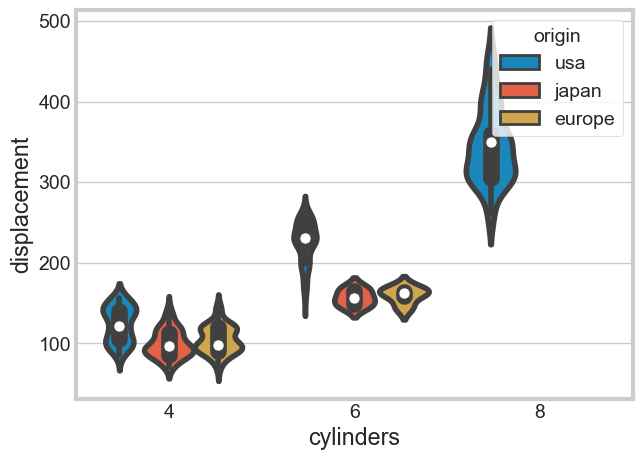

In [170]:
sns.violinplot(x="cylinders", y="displacement", data=cars_filtered, hue="origin");

In [171]:
cars_filtered2 = cars_filtered[cars_filtered.origin.isin(["japan", "europe"])]

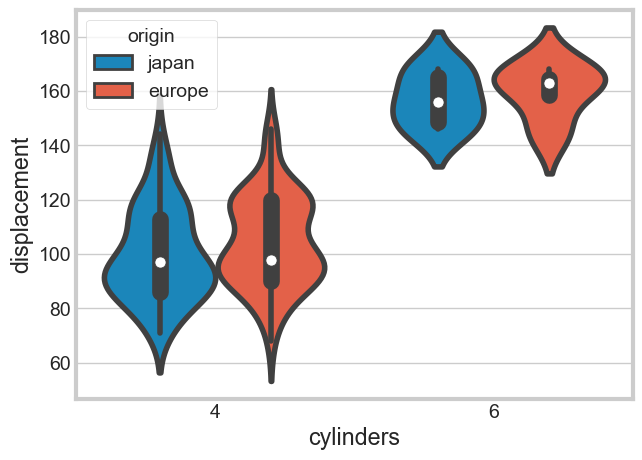

In [172]:
sns.violinplot(x="cylinders", y="displacement", data=cars_filtered2, hue="origin");

- ``` js
  split 
  ```
Show an un-mirrored distribution, alternating sides when using `hue`.

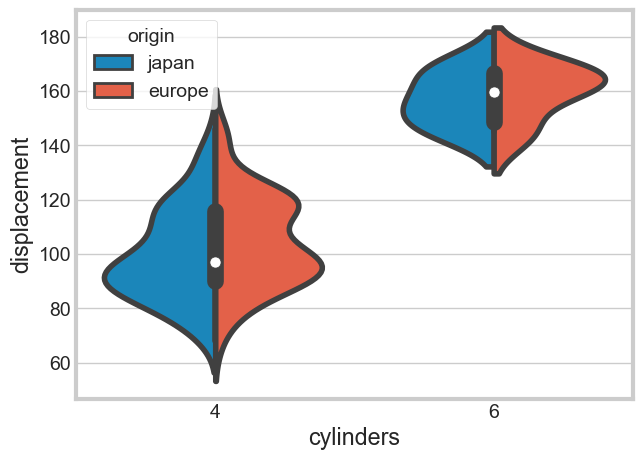

In [173]:
sns.violinplot(x="cylinders", y="displacement", data=cars_filtered2, hue="origin", 
               split=True); # to make it happen, we need to have exactly 2 categories in the hue argument

- ``` js
  inner
  ``` 
Representation of the data in the violin interior. One of the following:

- `"box"`: draw a miniature box-and-whisker plot

- `"quart"`: show the quartiles of the data

- `"point"` or `"stick"`: show each observation

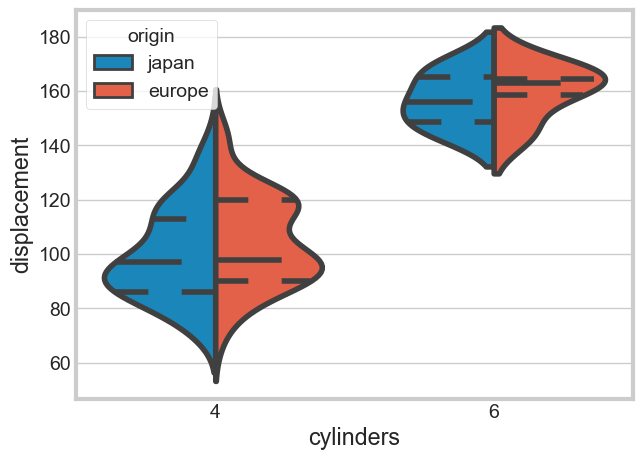

In [174]:
sns.violinplot(x="cylinders", y="displacement", data=cars_filtered2, hue="origin",
                split=True, 
                inner="quartileS");

- ``` js
  scale
  ``` 
Method that normalizes each density to determine the violin’s width. One of the followning:
    
- `"area"`: each violin will have the same area.

- `"count"`: the width will be proportional to the number of observations.

- `"width"`: each violin will have the same width.

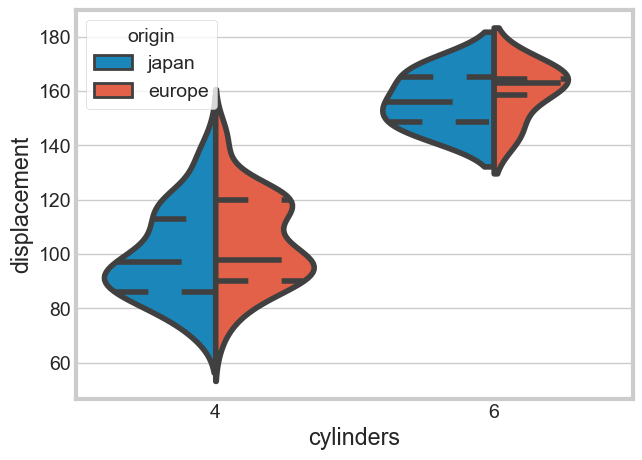

In [175]:
sns.violinplot(x="cylinders", y="displacement", data=cars_filtered2, hue="origin",
                split=True, 
                inner="quartileS", 
                scale="count");

- ``` js
  scale_hue
  ``` 
When `True`, normalize the density across all violins.

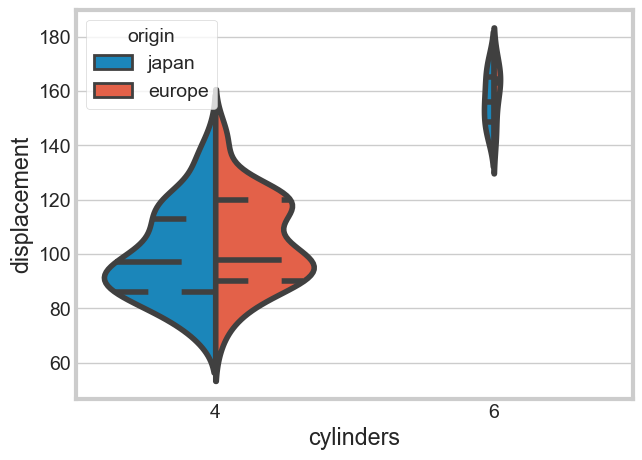

In [176]:
sns.violinplot(x="cylinders", y="displacement", data=cars_filtered2, hue="origin",
                split=True, 
                inner="quartileS", 
                scale_hue=False, 
                scale="count" 
                );

In [177]:
# to prove it, let's look at the count of each cylinder in each origin
cars_filtered2.groupby(["cylinders", "origin"]).size()

cylinders  origin
4          europe    61
           japan     69
6          europe     4
           japan      6
dtype: int64

So now we see that 4 cylinders from europe and japan is way more bigger than the ones with 6 cylinders.

- ``` js
  order
  ```
To order the categories in the plot.

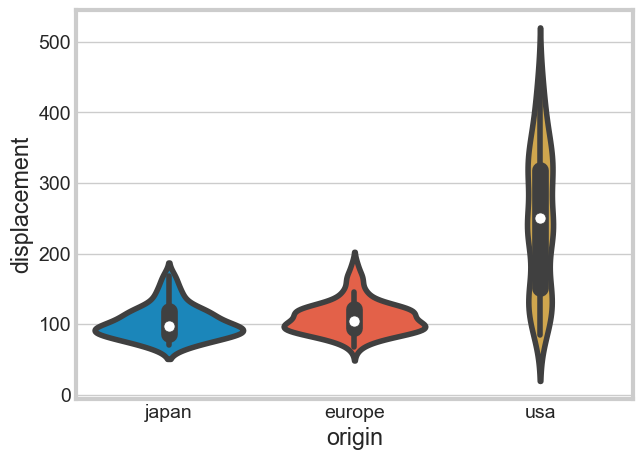

In [178]:
sns.violinplot(x = "origin", y = "displacement", data = cars, 
               order = ["japan", "europe", "usa"]);

- ``` js
  linewidth
  ```
Width of the gray lines that divide each violin.

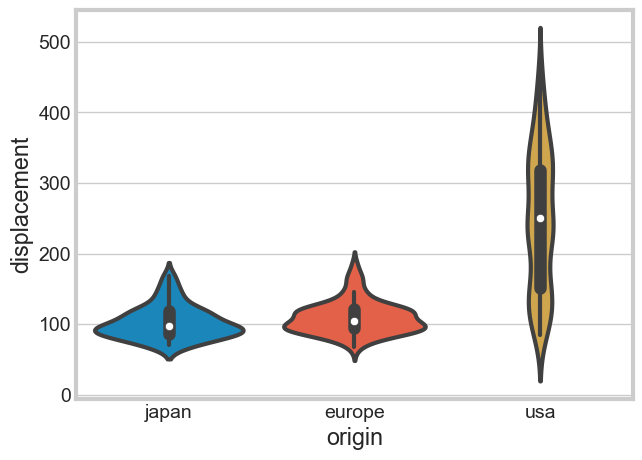

In [179]:
sns.violinplot(x = "origin", y = "displacement", data = cars,
                order = ["japan", "europe", "usa"], 
                linewidth=3);

- ``` js
  bw
  ```
Bandwidth of the kernel density estimate(like the `bw` parameter in **kdeplot**).

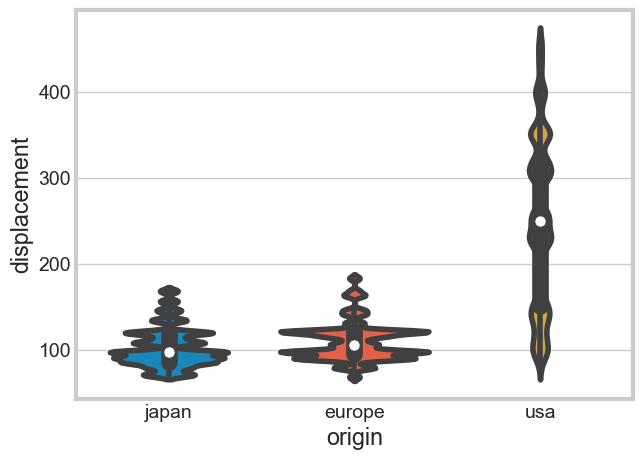

In [180]:
sns.violinplot(x = "origin", y = "displacement", data = cars,
                order = ["japan", "europe", "usa"],  
                bw=0.1);

# Swarm plot

It's like a scatter plot but with categorical variable, so it's usually called categorical scatter plot.

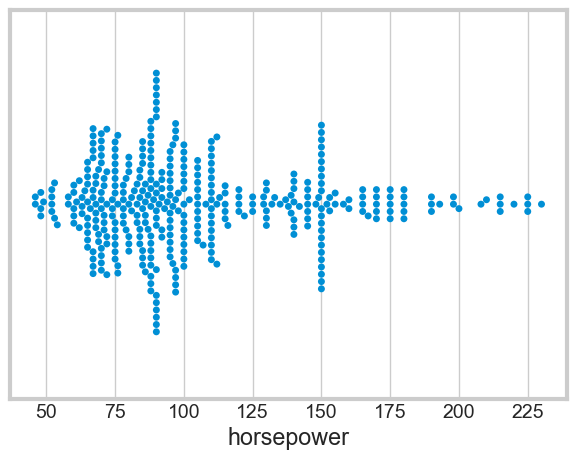

In [181]:
sns.swarmplot(x="horsepower", data=cars_filtered);

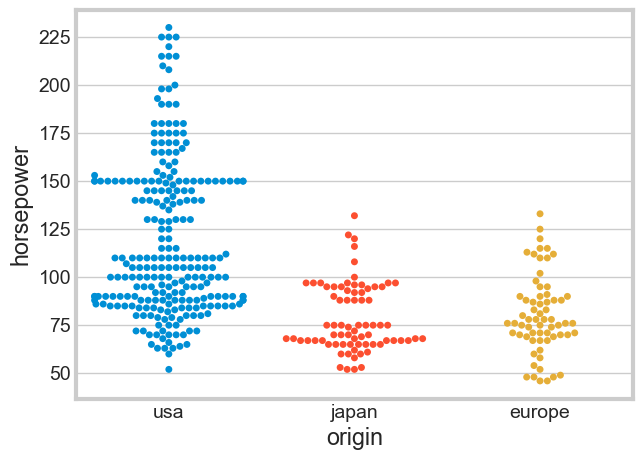

In [182]:
sns.swarmplot(x="origin", y="horsepower", data=cars_filtered);

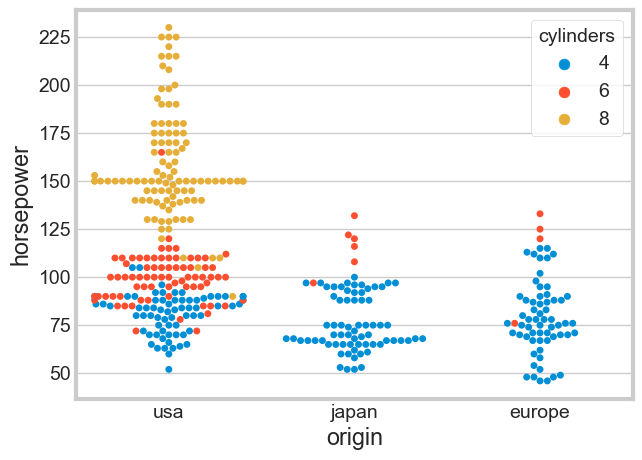

In [183]:
sns.swarmplot(x="origin", y="horsepower", data=cars_filtered, hue="cylinders");

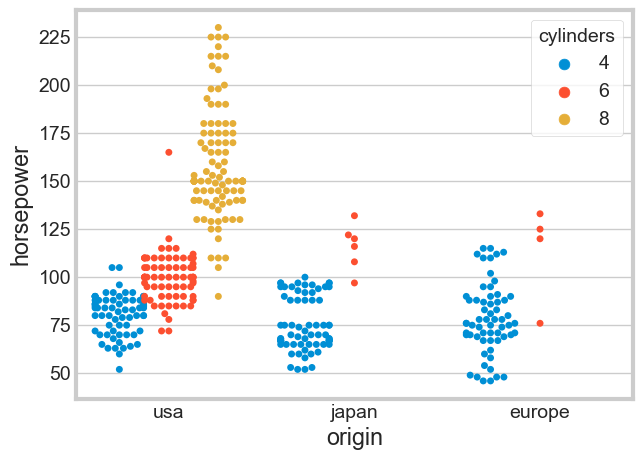

In [184]:
sns.swarmplot(x="origin", y="horsepower", data=cars_filtered, hue="cylinders",
              dodge=True); # to separate the points of each category in the hue argument

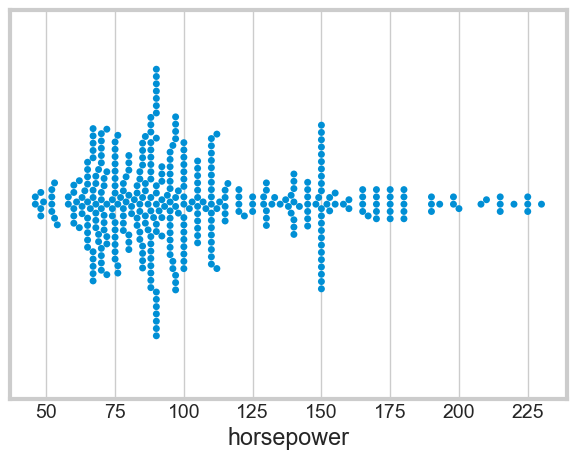

In [185]:
sns.swarmplot(x="horsepower", data=cars);

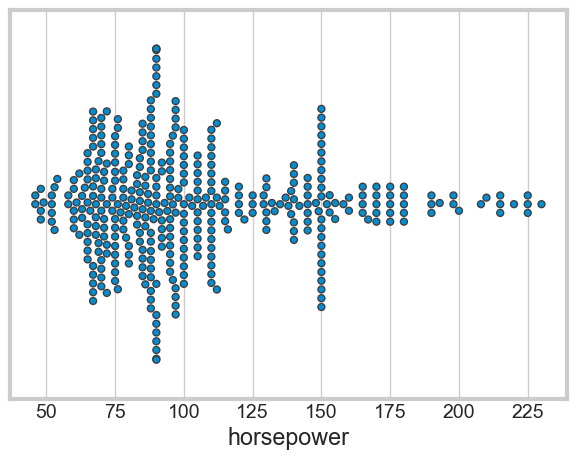

In [186]:
sns.swarmplot(x="horsepower", data=cars, linewidth=1);

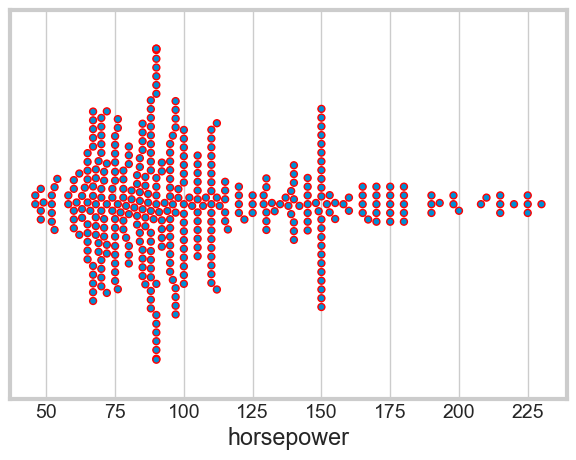

In [187]:
sns.swarmplot(x="horsepower", data=cars, linewidth=1, edgecolor="Red");

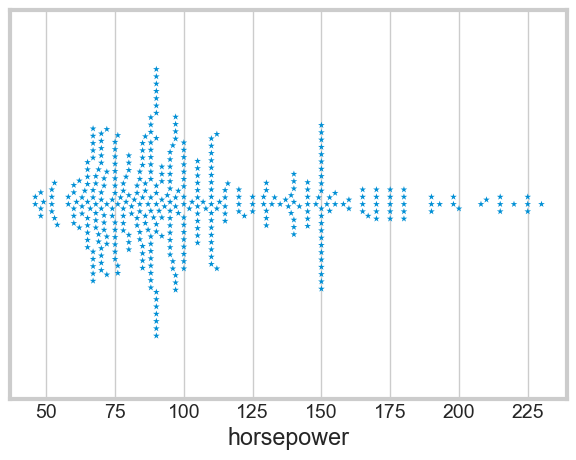

In [188]:
sns.swarmplot(x="horsepower", data=cars, marker='*'); # inherited from matplotlib

## Swarm plot overlay

### With boxplot

In [189]:
usa_cars = cars[cars.origin == "usa"]

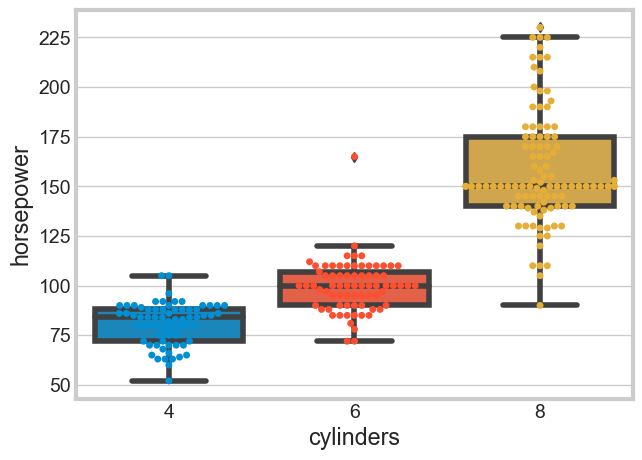

In [190]:
sns.boxplot(x="cylinders", y="horsepower", data=usa_cars)
sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars);

Let's do some styling to make it looks good.

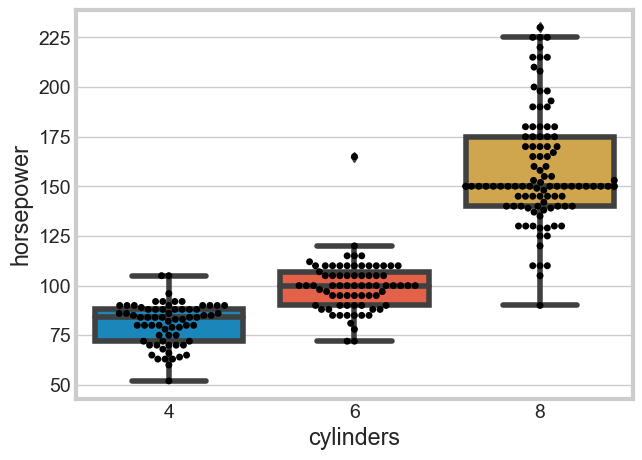

In [191]:
sns.boxplot(x="cylinders", y="horsepower", data=usa_cars)

sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars,
              color="black");

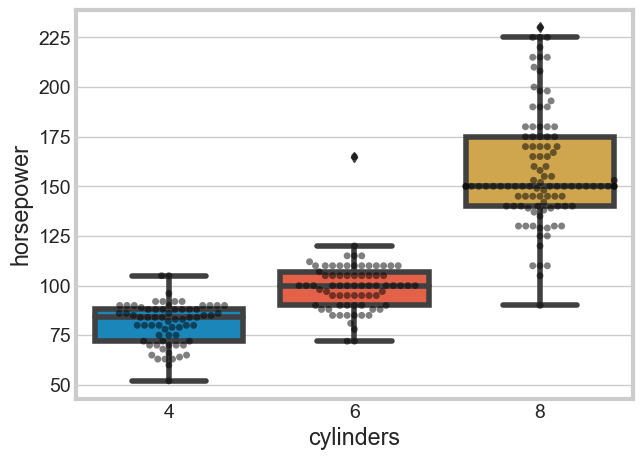

In [192]:
sns.boxplot(x="cylinders", y="horsepower", data=usa_cars)

sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars,
              color="black",
              alpha=0.5);

In [ ]:
sns.boxplot(x="cylinders", y="horsepower", data=usa_cars,
            whis=np.inf) # to not show the outliers

sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars,
              color="black",
              alpha=0.5);

### With violin plot

In [1]:
sns.violinplot(x="cylinders", y="horsepower", data=usa_cars)
sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars);

NameError: name 'sns' is not defined

Also, let's do some styling to make it looks good.

In [ ]:
sns.violinplot(x="cylinders", y="horsepower", data=usa_cars)

sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars,
                color="White");

In [ ]:
sns.violinplot(x="cylinders", y="horsepower", data=usa_cars,
               scale="width")

sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars,
                color="White");

In [ ]:
sns.violinplot(x="cylinders", y="horsepower", data=usa_cars,
               scale="width") # to make the width of the violins the same    

sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars,
                color="White",
                size=3);

In [ ]:
sns.violinplot(x="cylinders", y="horsepower", data=usa_cars,
               scale="width",
               inner=None) # to remove the box plot in the violin plot

sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars,
                color="White",
                size=3);

In [ ]:
sns.violinplot(x="cylinders", y="horsepower", data=usa_cars,
               scale="width",
               inner=None,
               color = "xkcd:forest green")

sns.swarmplot(x="cylinders", y="horsepower", data=usa_cars,
                color="White",
                size=3);

# Strip plot

It's also a categorical scatter plot, but there is a difference:

- Swarm plot: dots are arranged in neat vertical lines, so you can estimate the distribution of the data by looking
    at the width of the swarm plot.

- Strip plot: dots are arranged randomly in the vertical direction, so we can't use the width to estimate the distribution function, but the good thing is the color will be transparent, so now we can use color intensity to estimate the density of the data.

In [61]:
cars = sns.load_dataset("mpg").dropna()

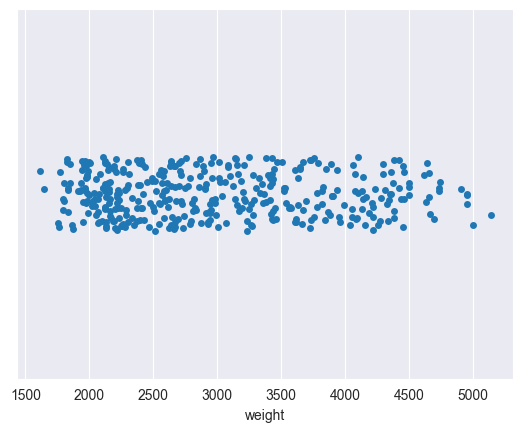

In [62]:
sns.stripplot(x='weight', data=cars);

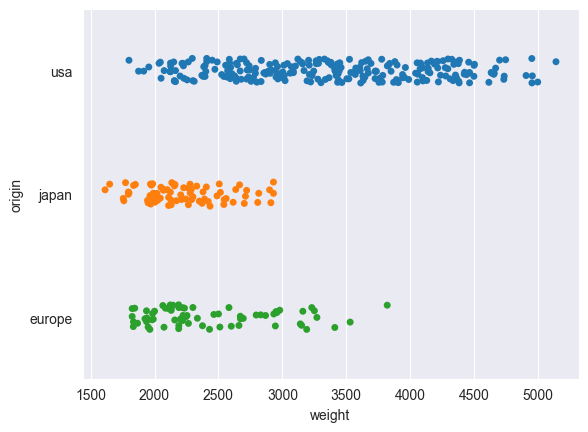

In [63]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette());

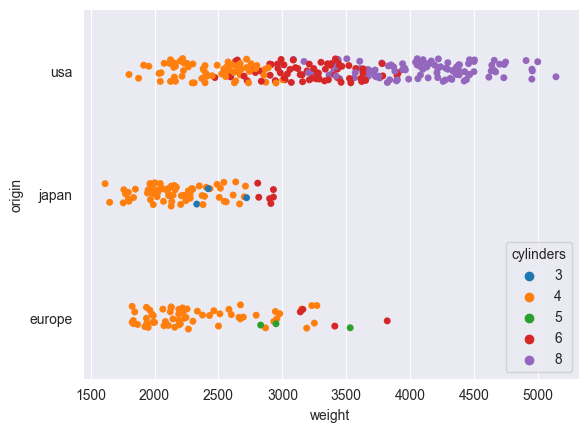

In [64]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(), hue='cylinders');

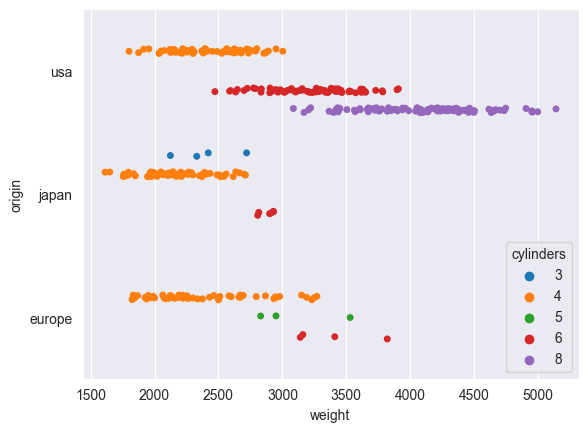

In [65]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(), hue='cylinders', dodge=True);

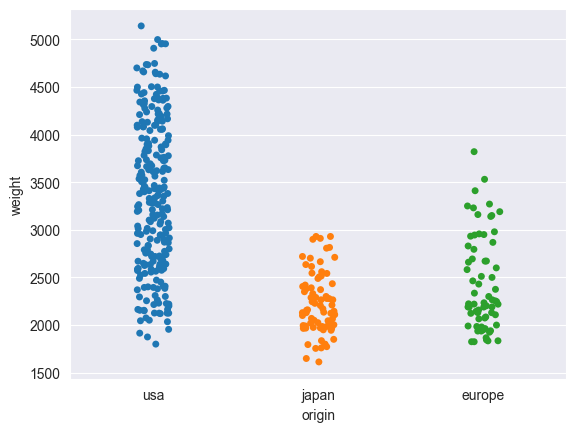

In [66]:
sns.stripplot(y='weight', x='origin', data=cars, palette=sns.color_palette());

### `jitter`
Amount of jitter (only along the categorical axis) to apply.

In [ ]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(),
                jitter=0.5);

In [ ]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(),
                jitter=0.1);

In [ ]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(),
                jitter=False);

In [ ]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(),
                jitter=True); # it puts it with the appropiate default

To just demonstrate how jitter affect the plot, we will make an interactive plot

In [ ]:
from ipywidgets import interactive

def strip_widget(jitter=0.1):
    sns.stripplot(x='weight', y='origin', data=cars, jitter=jitter, palette=sns.color_palette())

interactive(strip_widget, jitter=(0, 0.6, 0.05))

In [ ]:

sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(),
              alpha=0.5);

In [ ]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(), 
              size=7,
              alpha=0.2);

In [ ]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(), 
              size=3,
              alpha=0.7);

In [2]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(), 
              linewidth=1);

NameError: name 'sns' is not defined

In [3]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(), 
              linewidth=1, edgecolor='red');

NameError: name 'sns' is not defined

In [4]:
sns.stripplot(x='weight', y='origin', data=cars, palette=sns.color_palette(), 
              linewidth=0.2, 
              edgecolor='black',
              size=7,
              marker='*',
              alpha=0.4,
              jitter=0.2);

NameError: name 'sns' is not defined

# Reg plot

- It's a combination between scatter plot and line plot.
- It's useful when you want to see the relationship between two variables.
- It draw a linear regression line that fits the data as possible it could.

In [5]:
diamonds = sns.load_dataset('diamonds')
diamonds.shape

NameError: name 'sns' is not defined

In [6]:
diamonds.head()

NameError: name 'diamonds' is not defined

In [7]:
diamonds_sample = diamonds.sample(n=200, random_state=44)

NameError: name 'diamonds' is not defined

In [8]:
diamonds_sample.shape

NameError: name 'diamonds_sample' is not defined

In [9]:
sns.set_style('dark')

NameError: name 'sns' is not defined

In [10]:
sns.regplot(x="carat", y="price", data=diamonds_sample);

NameError: name 'sns' is not defined

In [11]:
sns.regplot(x="carat", y="price", data=diamonds_sample, fit_reg=False);

NameError: name 'sns' is not defined

In [12]:
sns.regplot(x="carat", y="price", data=diamonds_sample, scatter=False);

NameError: name 'sns' is not defined

In [13]:
sns.regplot(x="carat", y="price", data=diamonds_sample,
           ci = None); # to turn the confidence interval off

NameError: name 'sns' is not defined

In [14]:
diamonds_sample['cut_values'] = diamonds_sample.cut.map({
    'Fair':1,
    'Good':2,
    'Very Good':3,
    'Premium':4,
    'Ideal':5
})

NameError: name 'diamonds_sample' is not defined

In [15]:
diamonds_sample.cut_values.value_counts()

NameError: name 'diamonds_sample' is not defined

In [16]:
sns.regplot(x="carat", y="price", data=diamonds_sample,
            order=2
           );

NameError: name 'sns' is not defined

In [17]:
x_example = np.arange(0, 5, 0.5)
y_example = [i for i in range(0, 9, 1)]
y_example.append(25)

NameError: name 'np' is not defined

In [18]:
sns.regplot(x=x_example, y=y_example);

NameError: name 'sns' is not defined

In [19]:
sns.regplot(x=x_example, y=y_example, ci=None,
           robust=True
           );

NameError: name 'sns' is not defined

In [20]:
sns.regplot(x="carat", y="price", data=diamonds_sample,
           marker='d'
           );

NameError: name 'sns' is not defined

## Styling

In [21]:
sns.regplot(x="carat", y="price", data=diamonds_sample,
           scatter_kws={'s':90, 'alpha':0.4, 'color':'xkcd:gray'}); #to control scatter properties

NameError: name 'sns' is not defined

In [22]:
sns.regplot(x="carat", y="price", data=diamonds_sample,
            line_kws={'linewidth':4, 'color':"black", 'linestyle':'--'}); # to control line plot properties


NameError: name 'sns' is not defined

Let's combine them and see the result:

In [23]:
sns.regplot(x="carat", y="price", data=diamonds_sample,
            scatter_kws={'s':90, 'alpha':0.4, 'color':'xkcd:gray'},
            line_kws={'linewidth':4, 'color':"black", 'linestyle':'--'});

NameError: name 'sns' is not defined

# Cluster map

In [24]:
penguins = sns.load_dataset('penguins').dropna()
penguins.shape

NameError: name 'sns' is not defined

In [25]:
penguins.head()

NameError: name 'penguins' is not defined

In [26]:
numerical_cols = penguins.columns[2:6]
numerical_cols

NameError: name 'penguins' is not defined

In [27]:
sns.clustermap(penguins[numerical_cols], standard_scale=1); # 1 for columns, 0 for rows

NameError: name 'sns' is not defined

In [28]:
sns.clustermap(penguins[numerical_cols], standard_scale=1,
               method="single"
               )

NameError: name 'sns' is not defined

In [29]:
sns.clustermap(penguins[numerical_cols], standard_scale=1,
               metric='cityblock'
               )

NameError: name 'sns' is not defined

In [30]:
species_colors = penguins.species.map({
    'Adelie':'blue',
    'Chinstrap':'red',
    'Gentoo':'green'
})

NameError: name 'penguins' is not defined

In [31]:
len(species_colors)

NameError: name 'species_colors' is not defined

In [32]:
species_colors[:5]

NameError: name 'species_colors' is not defined

In [33]:
sns.clustermap(penguins[numerical_cols], standard_scale=1,
               row_colors=species_colors
               )

NameError: name 'sns' is not defined

# Pair plot

In [2]:
tips = sns.load_dataset("tips").dropna()
tips.shape

(244, 7)

In [3]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [4]:
sns.set_style('darkgrid')

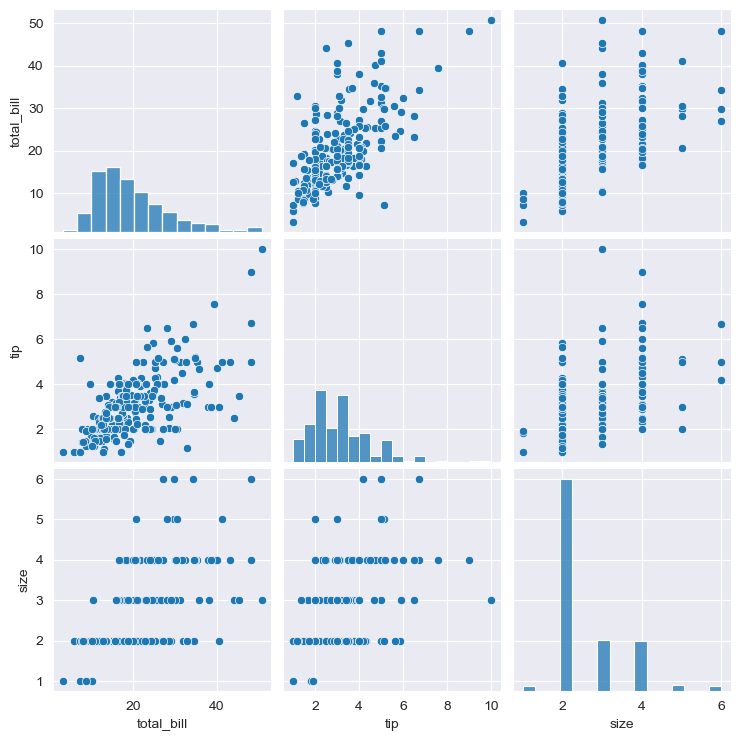

In [5]:
sns.pairplot(tips);

In [12]:
sns.pairplot(tips, diag_kind='kde') # to edit the plot in the diagonal('kde' or 'hist')
plt.show()

In [13]:
sns.pairplot(tips, kind='reg')# to edit the plot in other than the 

<class 'seaborn.axisgrid.PairGrid'>


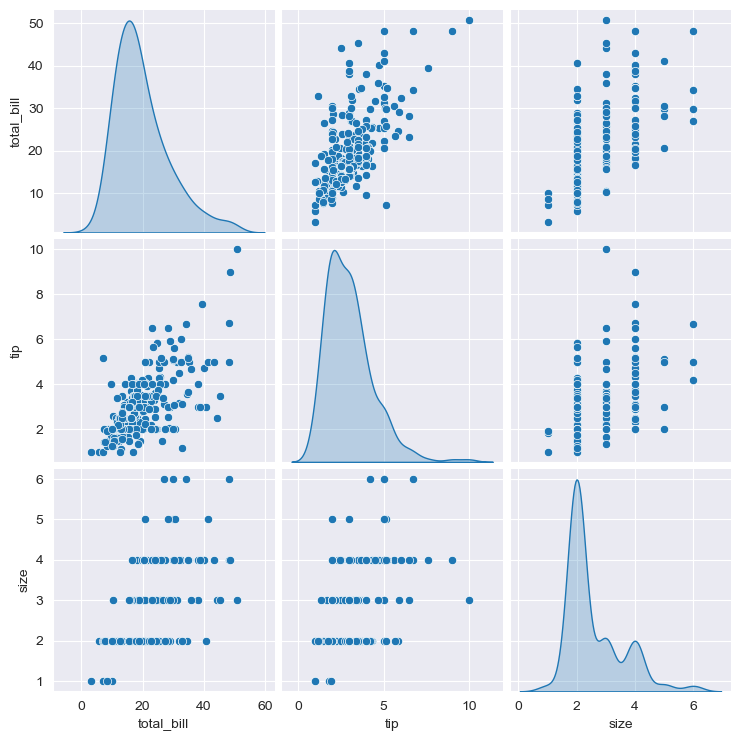

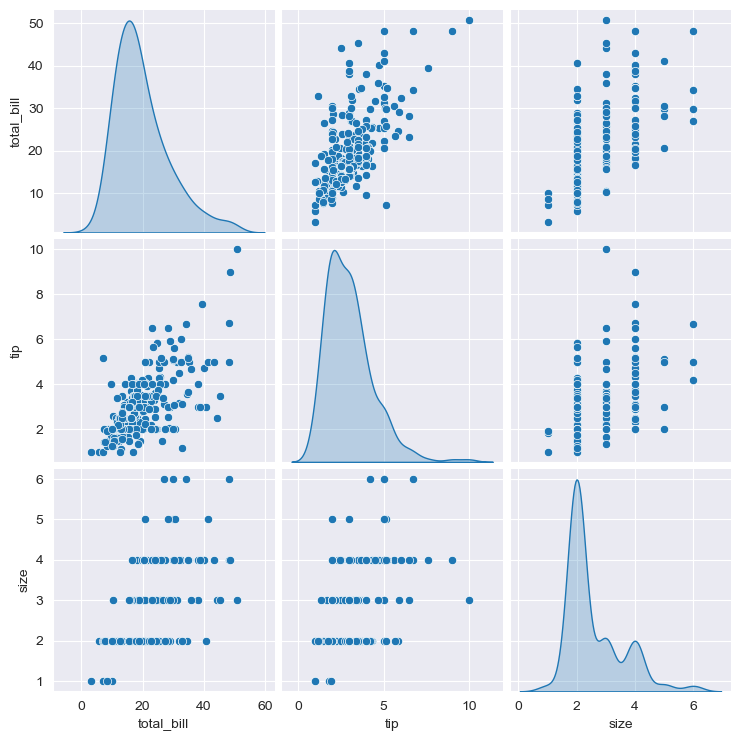

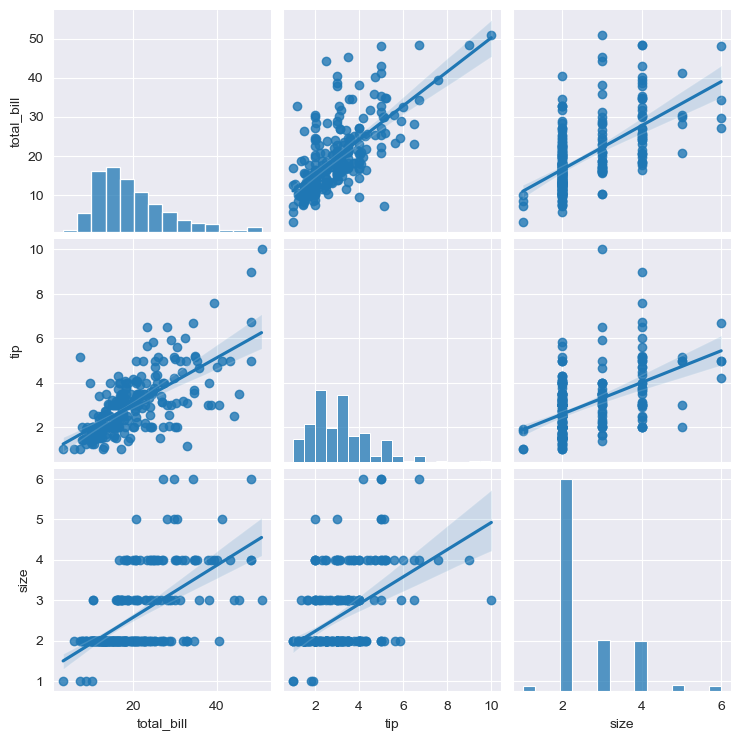

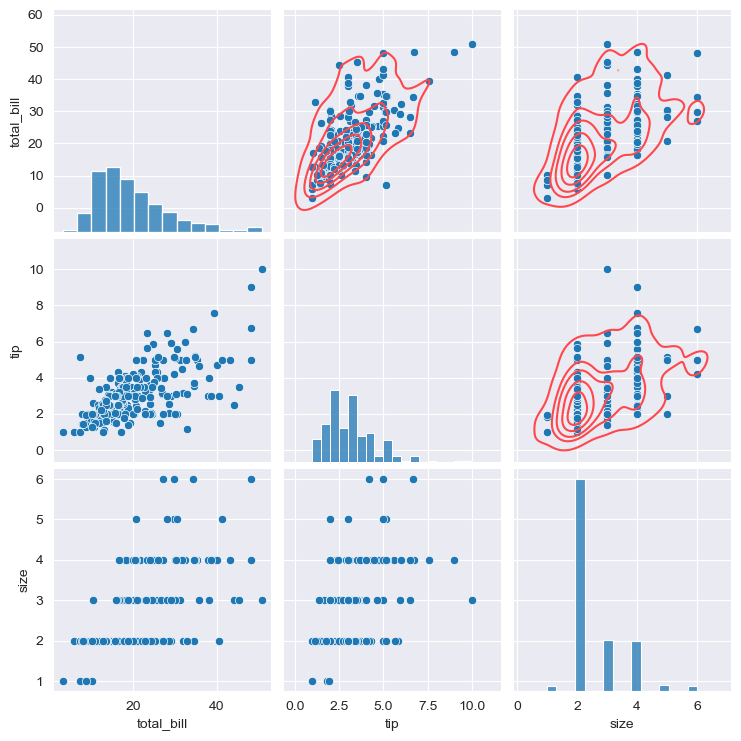

In [14]:
g = sns.pairplot(tips)
print(type(g))
g.map_upper(sns.kdeplot, n_levels=6, color='xkcd:light red'); # to plot another plot stacked on the upper triangle of the pair plot

In [53]:
tips['weekend'] = tips.day.isin(['Sat', 'Sun'])
tips.head()

total_bill   tip     sex smoker  day    time  size  weekend
0       16.99  1.01  Female     No  Sun  Dinner     2     True
1       10.34  1.66    Male     No  Sun  Dinner     3     True
2       21.01  3.50    Male     No  Sun  Dinner     3     True
3       23.68  3.31    Male     No  Sun  Dinner     2     True
4       24.59  3.61  Female     No  Sun  Dinner     4     True

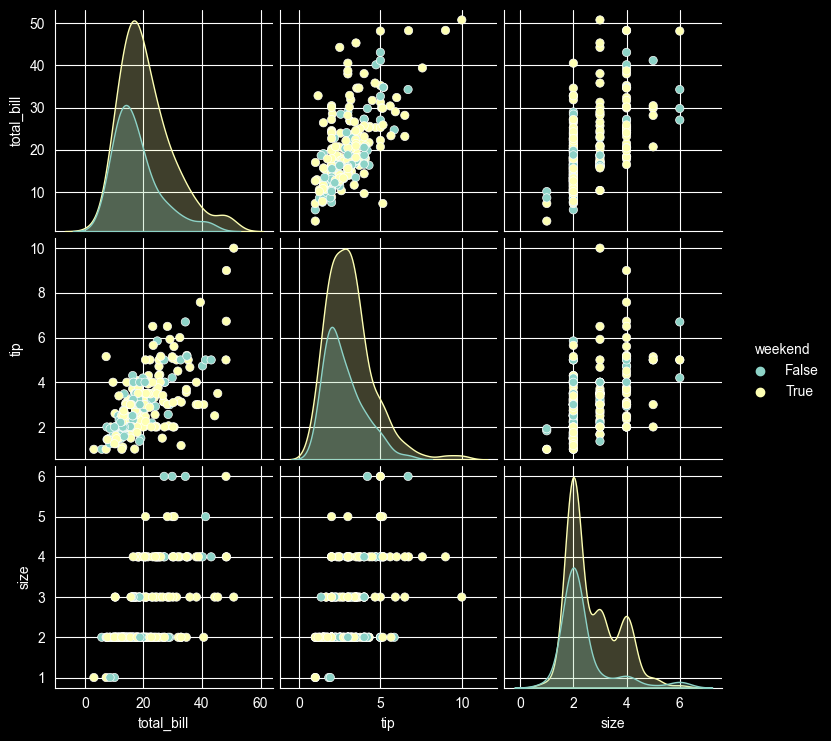

In [55]:
sns.pairplot(tips, hue='weekend');

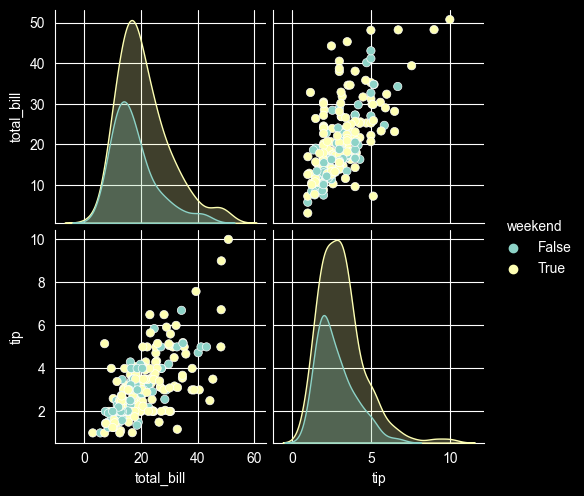

In [57]:
sns.pairplot(tips, hue='weekend', vars=['total_bill', 'tip']);

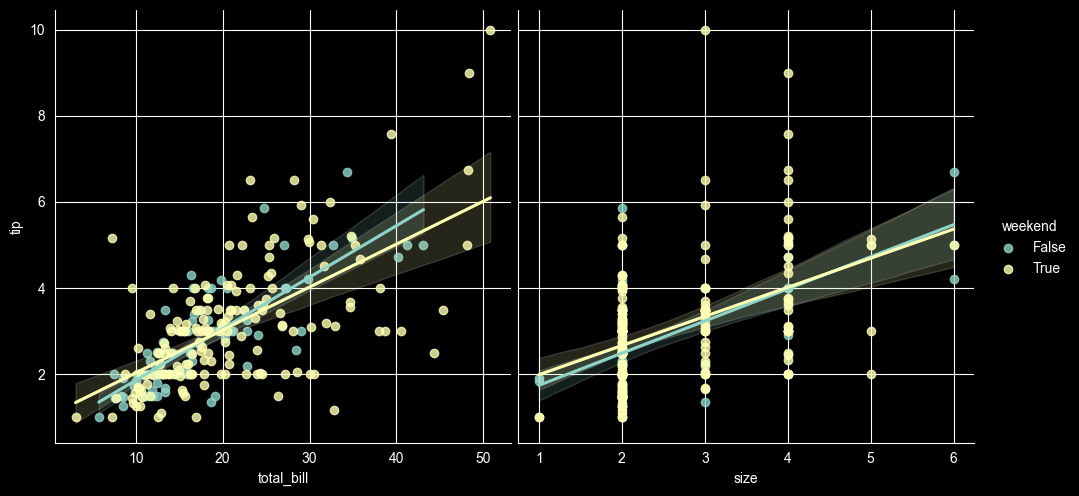

In [61]:
sns.pairplot(tips,
            hue='weekend',
            y_vars=['tip'],
            x_vars=['total_bill', 'size'],
            kind='reg',
            height=5)

In [62]:
del tips['weekend']

Just to see the effect of `height` and `aspect`, we will make an interactive plot:

In [63]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(tips, height=height, aspect=aspect)
    
interactive(size_widget, height=(1, 3.5, 0.5), aspect= (0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

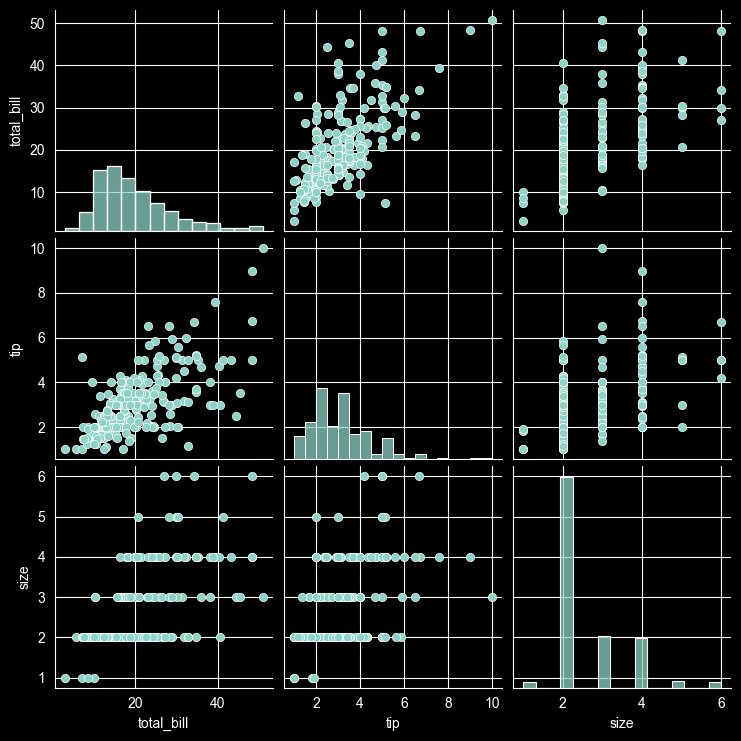

In [65]:
sns.pairplot(tips, palette='plasma');

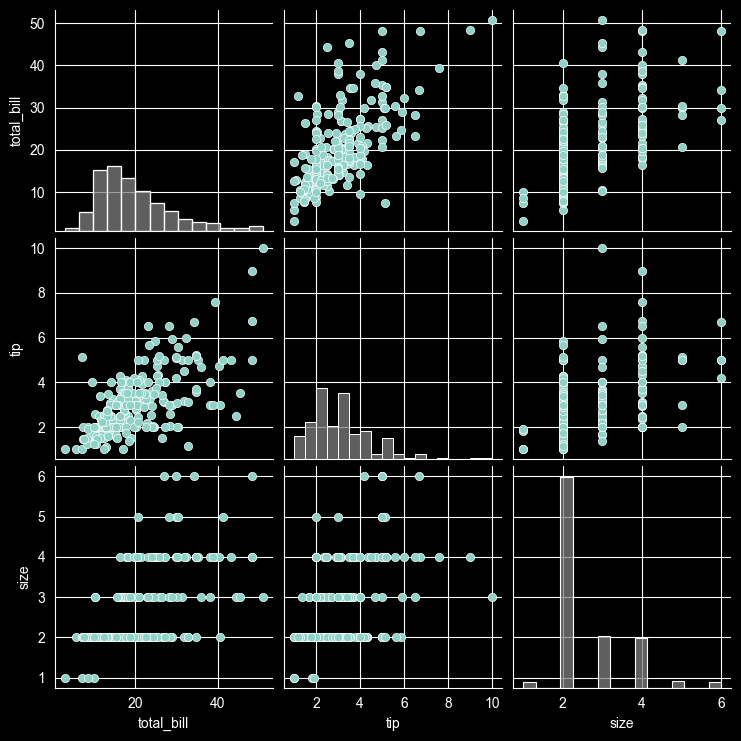

In [68]:
sns.pairplot(tips,
             diag_kws={'color':'gray'});

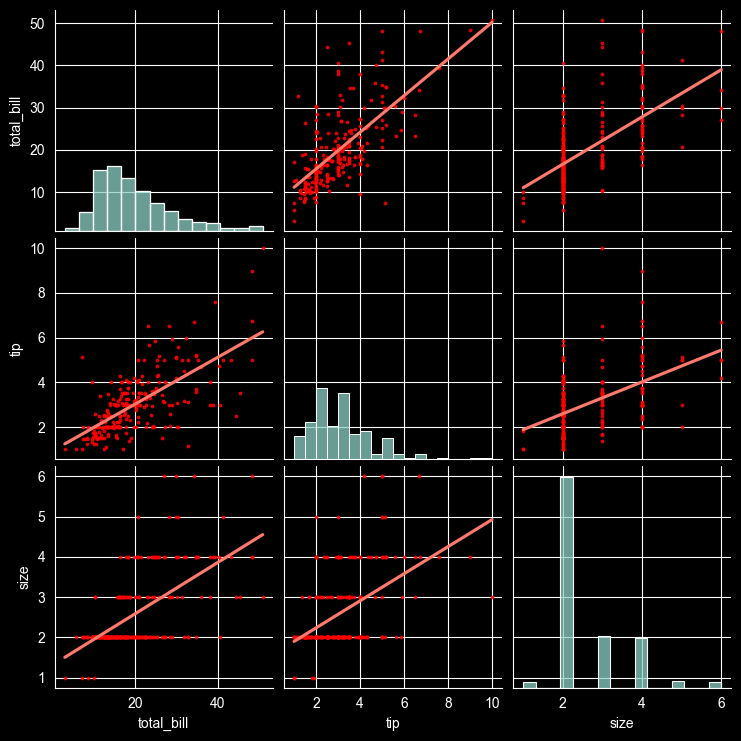

In [71]:
sns.pairplot(tips, kind='reg',
             plot_kws={'ci':None, 'color':'xkcd:salmon',
                       'scatter_kws':{'color':'red', 's':3}});

# Joint plot

In [2]:
geyser = sns.load_dataset('geyser').dropna()
geyser.shape

(272, 3)

In [3]:
geyser.head()

duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long

In [4]:
sns.set_style('darkgrid')

## Numerical variables

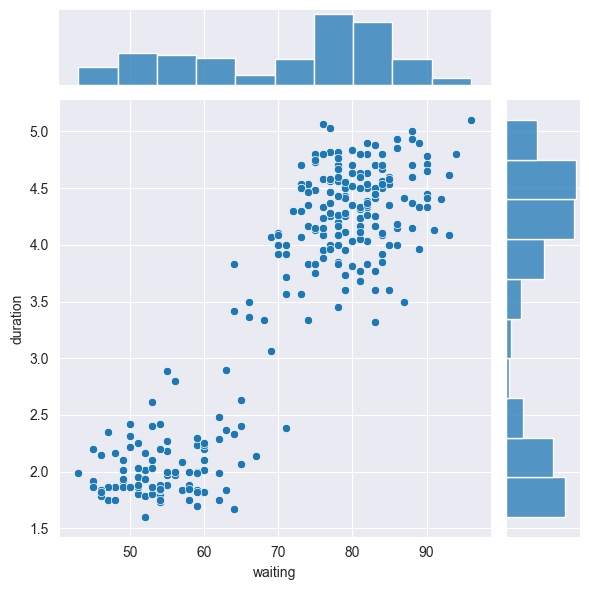

In [5]:
sns.jointplot(x='waiting', y='duration', data=geyser);

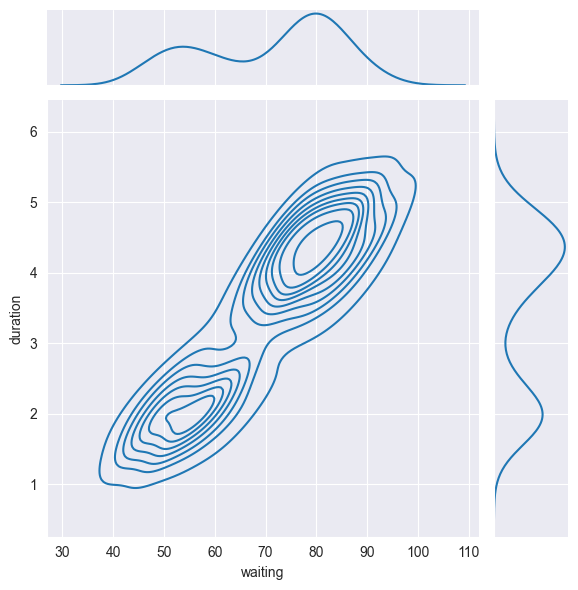

In [6]:
sns.jointplot(x='waiting', y='duration', data=geyser, 
              kind='kde'
              );

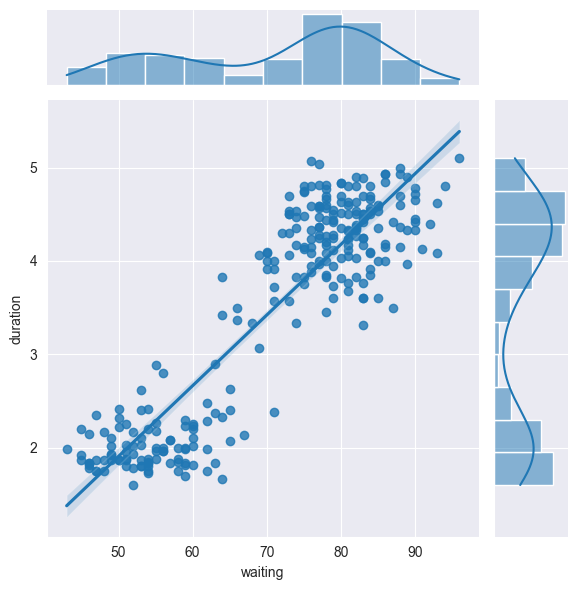

In [7]:
sns.jointplot(x='waiting', y='duration', data=geyser, 
              kind='reg'
              );

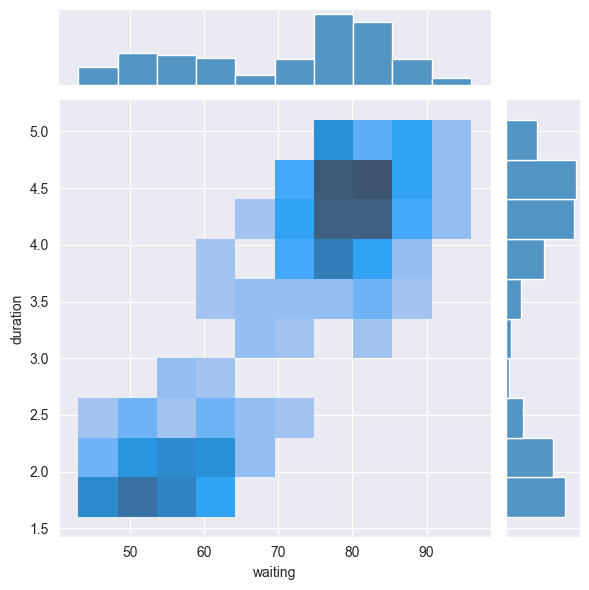

In [8]:
sns.jointplot(x='waiting', y='duration', data=geyser, 
              kind='hist'
              );

seaborn.axisgrid.JointGrid

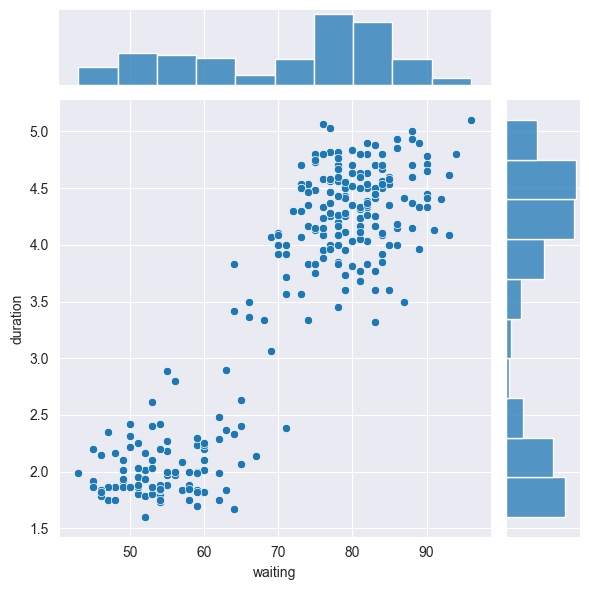

In [13]:
g = sns.jointplot(x='waiting', y='duration', data=geyser)
type(g)

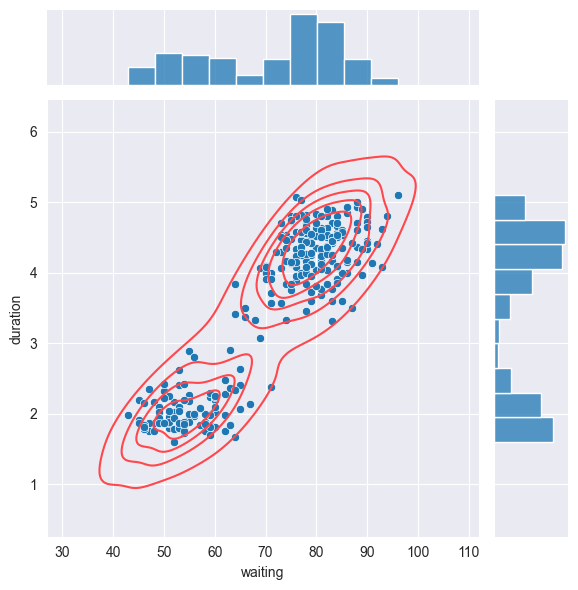

In [22]:
sns.jointplot(x='waiting', y='duration', data=geyser).plot_joint(sns.kdeplot, n_levels=6, color='xkcd:light red');

## Categorical variables

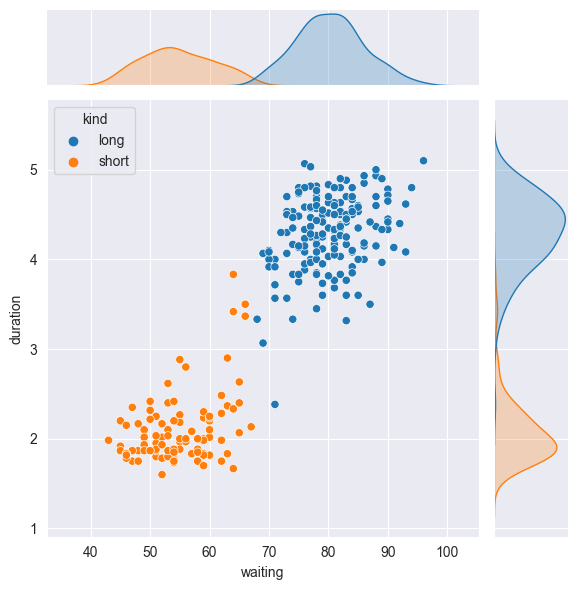

In [23]:
sns.jointplot(x='waiting', y='duration', data=geyser, hue='kind');

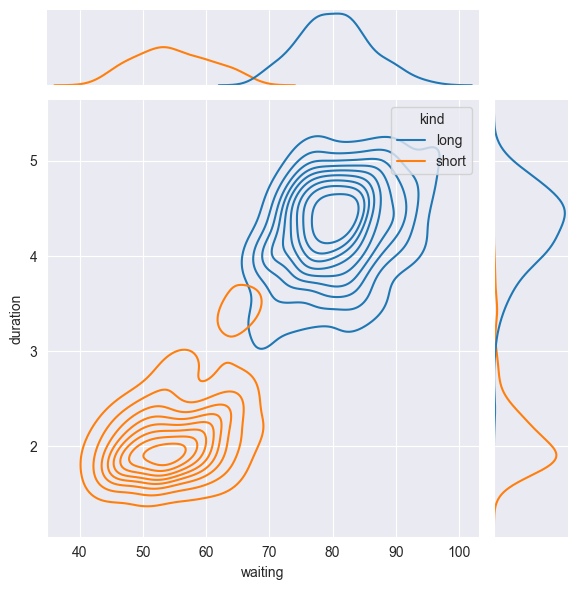

In [24]:
sns.jointplot(x='waiting', y='duration', data=geyser, hue='kind',
              kind = 'kde');

## Styling 

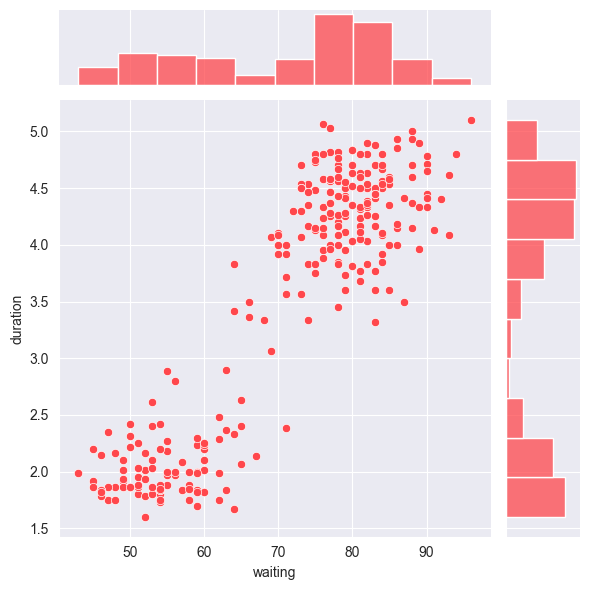

In [25]:
sns.jointplot(x='waiting', y='duration', data=geyser, color='xkcd:light red');

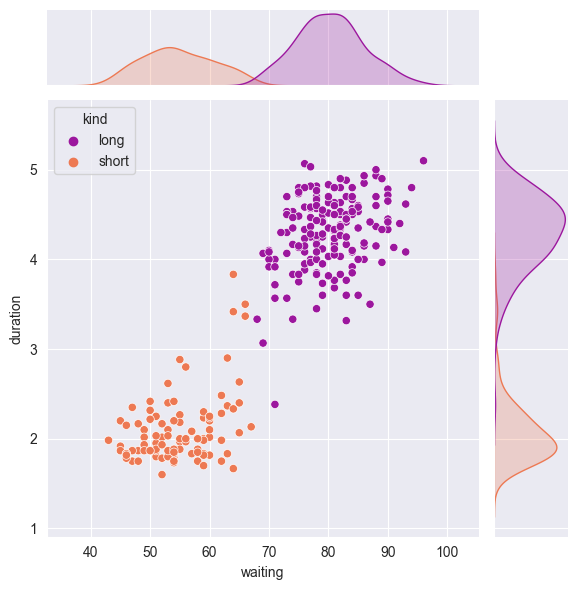

In [27]:
sns.jointplot(x='waiting', y='duration', data=geyser, hue='kind',
              palette='plasma');

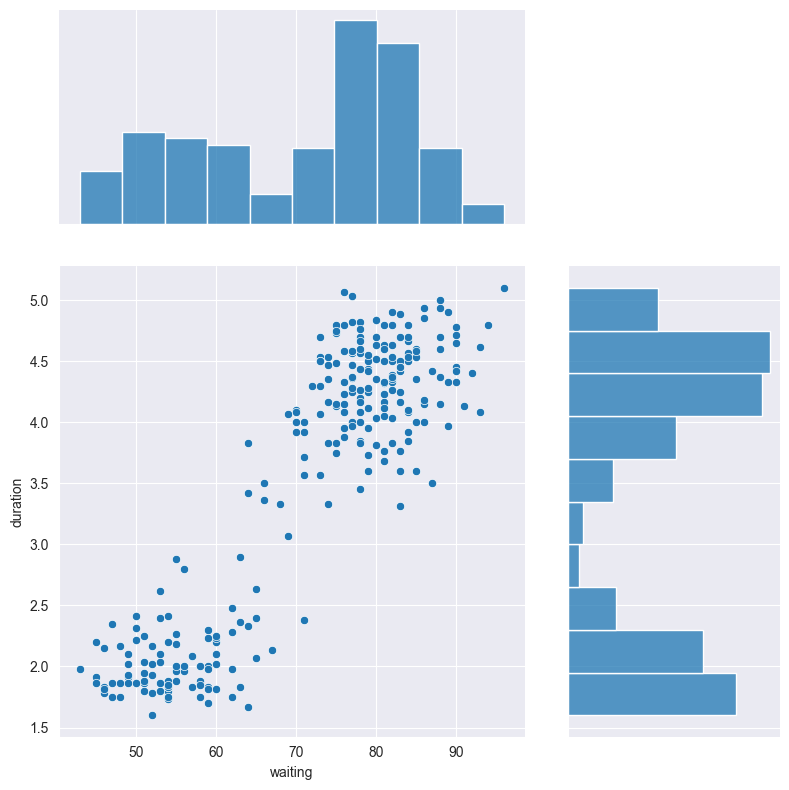

In [37]:
sns.jointplot(x='waiting', y='duration', data=geyser,
              height=8,
              space=0.2,
              ratio=2
              );

### `joint_kws`

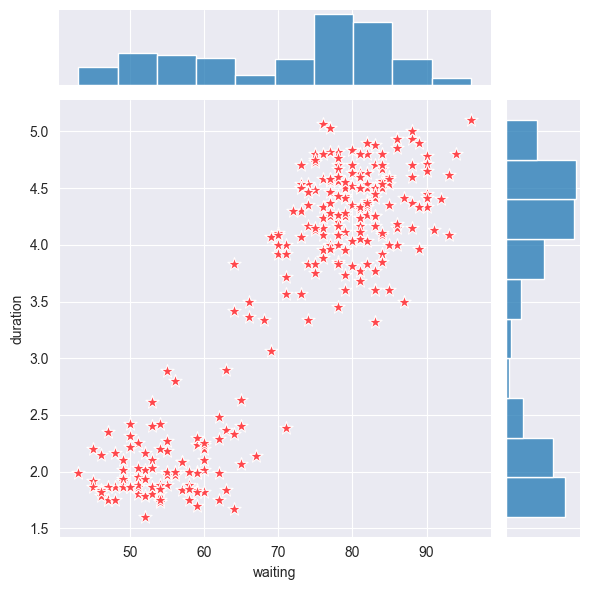

In [43]:
sns.jointplot(x='waiting', y='duration', data=geyser,
              joint_kws={'color':'xkcd:light red','marker':'*', 's':100 });

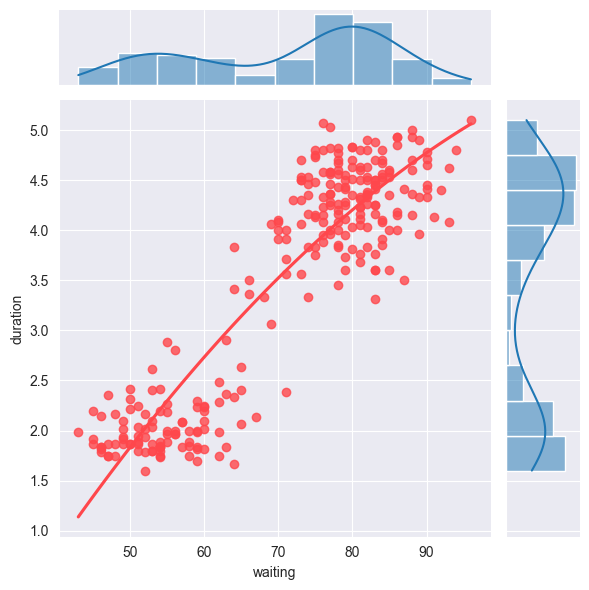

In [49]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='reg',
              joint_kws= {'color':'xkcd:light red', 'ci': None, 'order':2 });

### `marginal_kws`

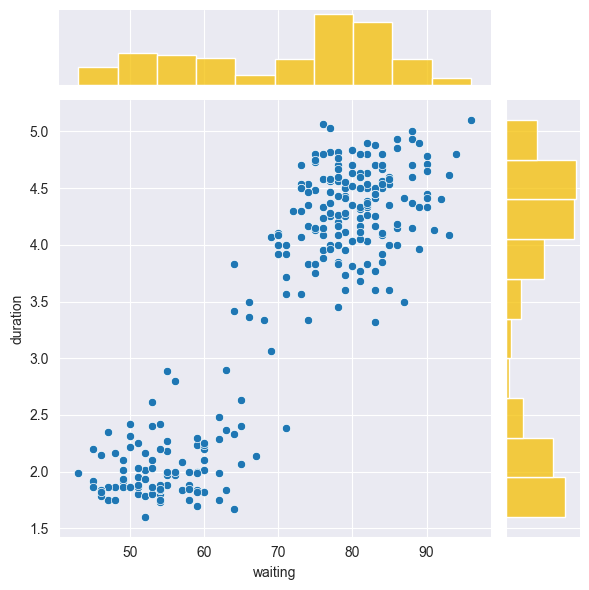

In [51]:
sns.jointplot(x='waiting', y='duration', data=geyser,
                marginal_kws={'color':'xkcd:golden'});

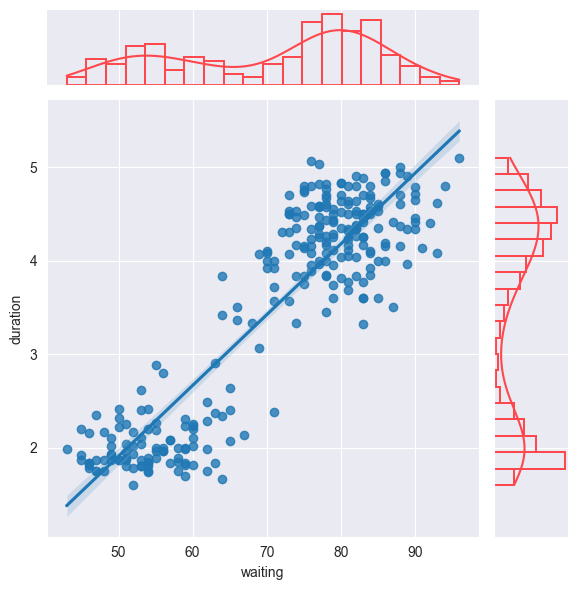

In [57]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='reg',
                marginal_kws={'color':'xkcd:light red', 'bins':20, 'fill':False});

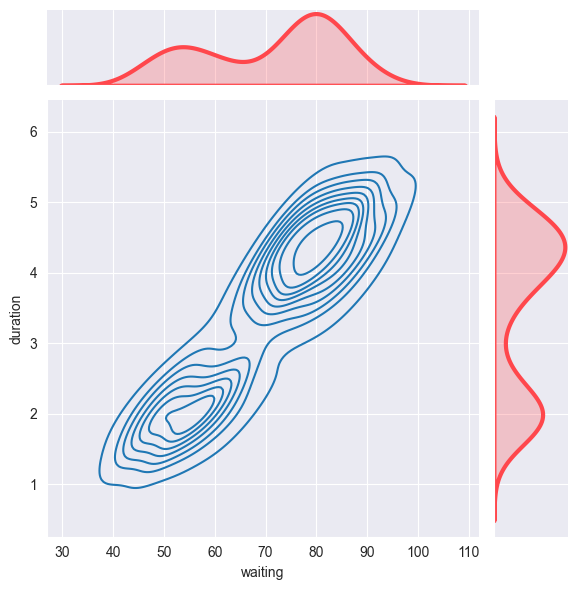

In [60]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='kde',
                marginal_kws={'color':'xkcd:light red', 'shade':True, 'lw':3});

# <div align="center">The end</div>

**Here we get to the end of the notebook, if you reached here congratulations; you have a useful library in your toolkit .**

This isn't everything in this fascinating library but I covered most of the popular topics.

**<div align="center">Thank you, and don't forget an upvote if you find it useful.</div>**